# Proyecto final



**Estudiante:** [Luis Alfredo Denis Garcia]

## Introducci√≥n




1.  **Definici√≥n de Objetivos:** Saber que locales y productos tienen mayor rentavilidad o movimiento.
    Preguntas espec√≠ficas:
¬øCu√°les son los 5 productos m√°s vendidos?
¬øCu√°les son las categorias de productos m√°s vendidos?
¬øCu√°les son las categorias de  productos que generan m√°s ingresos?
¬øCu√°les son las categorias de productos m√°s rentables?
¬øCu√°les son las categorias de productos menos rentables?
¬øCu√°les son los  pa√≠ses con mayor volumen de ventas?
¬øCu√°les son los  pa√≠ses con mayor volumen de ventas?
¬øCu√°les son los  estados con mayor volumen de ventas?
¬øC√≥mo han evolucionado las ventas totales a lo largo del tiempo (tendencia anual, mensual)?

2.  **Recopilaci√≥n de Datos:** Obtener el conjunto de datos de una fuente confiable.
3.  **Importar Librer√≠as:** Cargar las librer√≠as necesarias para el an√°lisis (como `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`).
4.  **Carga de Datos:** Leer el conjunto de datos en un DataFrame (generalmente usando `pandas`).
5.  **Inspecci√≥n Inicial:**
    -   Mostrar las primeras filas (`.head()`).
    -   Ver informaci√≥n general del DataFrame (`.info()`).
    -   Obtener estad√≠sticas descriptivas (`.describe()`).
6.  **Limpieza de Datos:**
    -   Identificar y manejar valores faltantes.
    -   Detectar y tratar datos at√≠picos (outliers).
    -   Corregir o eliminar datos err√≥neos o inconsistentes.
    -   Convertir tipos de datos si es necesario.
7.  **An√°lisis Univariado:** Examinar cada variable individualmente.
    -   Estad√≠sticas descriptivas.
    -   Visualizaciones (histogramas, diagramas de caja, gr√°ficos de barras, etc.).
    -   Medidas de Tendencia Central y Dispersi√≥n.
    -   An√°lisis de Curtosis y Asimetr√≠a.
8.  **An√°lisis Bivariado:** Explorar las relaciones entre pares de variables.
    -   Diagramas de dispersi√≥n, correlaci√≥n, boxplots, tablas de contingencia, etc.
9. **Analisis multivariado**.
10. **Extracci√≥n de Conclusiones:** Resumir los hallazgos y responder a las preguntas planteadas inicialmente.
11. **Comunicaci√≥n de Resultados:** Presentar los resultados de forma clara y concisa, utilizando visualizaciones y explicaciones adecuadas.


## 1. Importar las librer√≠as necesarias

Importa aqu√≠ las librer√≠as que utilizar√°s. Recuerda que adem√°s de las principales para EDA, para los nuevos analisis usaremos:

-   **`pandas`:** Para la manipulaci√≥n y an√°lisis de datos.
-   **`numpy`:** Para operaciones num√©ricas.
-   **`matplotlib.pyplot`:** Para la creaci√≥n de gr√°ficos.
-   **`seaborn`:** Para visualizaciones estad√≠sticas m√°s atractivas y complejas.
-   **`scipy.stats`:** Para an√°lisis estad√≠sticos, incluyendo curtosis, asimetr√≠a, y funciones de probabilidad.

Si necesitas librer√≠as adicionales, puedes importarlas tambi√©n.

In [1]:
# -- Importamos las librerias --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import empiricaldist
import janitor
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y descripci√≥n general del conjunto de datos

**2.1 Carga del conjunto de datos:**

- Utiliza `pandas` para cargar tu conjunto de datos en un DataFrame. 
- Asegurate de especificar correctamente la ruta del archivo. Puedes usar archivos CSV, Excel, JSON, u otros formatos soportados por `pandas`.

**2.2 Inspecci√≥n Inicial:**

-   Muestra las primeras filas del DataFrame usando `.head()` para tener una idea general de su estructura.
-   Utiliza `.info()` para obtener un resumen de las columnas, tipos de datos y valores no nulos.
-   Utiliza `.describe()` para obtener estad√≠sticas descriptivas de las variables num√©ricas.

## 3. Limpieza de datos

En este paso, aborda los problemas identificados en la inspecci√≥n inicial. Las acciones comunes incluyen:

**3.1 Manejo de Valores Faltantes:**
Decidi rellenar los valores nulos de la columna  Delivery Date con la fecha del pedido Order Date, para
no eliminar ninguna fila y perder informacion valiosa.

Tambien en la columna Square Meters algunas sucursales no tienen datos sobre su tama√±o. Podr√≠an ser sucursales online o datos faltantes. Asi que decidi rellenar valores nulos con la media de las sucursales f√≠sicas.



In [2]:
# -- primero realizo la carga de stores, luego una inspeccion inicial--
stores = pd.read_csv('D:\global electronic\stores.csv')
stores.head()
stores.info()
stores.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


StoreKey  Square Meters
count  67.000000      66.000000
mean   33.000000    1402.196970
std    19.485037     576.404058
min     0.000000     245.000000
25%    16.500000    1108.750000
50%    33.000000    1347.500000
75%    49.500000    2000.000000
max    66.000000    2105.000000

In [3]:
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [4]:
#analizar los formatos de fechas
stores["Open Date control"]= stores["Open Date"].astype(str)
#formato detectado
fecha_stores= stores["Open Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_stores)

Open Date control
X/X/XXXX      55
XX/XX/XXXX     8
X/XX/XXXX      2
XX/X/XXXX      2
Name: count, dtype: int64


In [5]:
# empezamos a convertir fechas con diferentes formatos
stores['Open Date'] = pd.to_datetime(stores['Open Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_stores = stores['Open Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
stores.loc[errores_stores, 'Open Date'] = pd.to_datetime(stores.loc[errores_stores, 'Open Date control'], format='%d/%m/%Y', errors='coerce')


In [6]:
print(stores[["StoreKey", "Open Date"]])

    StoreKey  Open Date
0          1 2008-01-01
1          2 2008-01-12
2          3 2012-01-07
3          4 2010-01-01
4          5 2015-12-09
..       ...        ...
62        63 2008-03-06
63        64 2010-01-01
64        65 2012-01-01
65        66 2014-01-01
66         0 2010-01-01

[67 rows x 2 columns]


In [7]:
#estandarizamos los nombres de las columnas con 
stores.columns = stores.columns.str.strip().str.lower().str.replace(" ", "_")

In [8]:
print(stores.columns)

Index(['storekey', 'country', 'state', 'square_meters', 'open_date',
       'open_date_control'],
      dtype='object')


In [9]:
Products = pd.read_csv('D:\global electronic\Products.csv')
Products.head()
Products.info()
Products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


ProductKey  SubcategoryKey  CategoryKey
count  2517.000000     2517.000000  2517.000000
mean   1259.000000      491.810091     4.878824
std     726.739637      229.887134     2.299170
min       1.000000      101.000000     1.000000
25%     630.000000      305.000000     3.000000
50%    1259.000000      406.000000     4.000000
75%    1888.000000      801.000000     8.000000
max    2517.000000      808.000000     8.000000

In [10]:
# Convertir ProductKey a num√©rico
Products['ProductKey'] = pd.to_numeric(Products['ProductKey'], errors='coerce')

# Convertir Unit Cost USD y Unit Price USD a num√©rico y eliminamos simbolo de usd
Products['Unit Cost USD'] = pd.to_numeric(Products['Unit Cost USD'].replace('[\$,]', '', regex=True), errors='coerce')
Products['Unit Price USD'] = pd.to_numeric(Products['Unit Price USD'].replace('[\$,]', '', regex=True), errors='coerce')

Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [11]:
Products.columns = Products.columns.str.strip().str.lower().str.replace(" ", "_")
print(Products.columns)

Index(['productkey', 'product_name', 'brand', 'color', 'unit_cost_usd',
       'unit_price_usd', 'subcategorykey', 'subcategory', 'categorykey',
       'category'],
      dtype='object')


In [12]:
exchange = pd.read_csv('D:\global electronic\Exchange_Rates.csv')
exchange.head()
exchange.info()
exchange.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


Exchange
count  11215.000000
mean       1.061682
std        0.245519
min        0.628500
25%        0.857800
50%        1.000000
75%        1.311900
max        1.725300

In [13]:
#analizar los formatos de fechas
exchange["Date control"]= exchange["Date"].astype(str)
#formato detectado
fecha_exchange= exchange["Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_exchange)

Date control
X/XX/XXXX     5935
X/X/XXXX      2520
XX/XX/XXXX    1950
XX/X/XXXX      810
Name: count, dtype: int64


In [14]:
# empezamos a convertir fechas con diferentes formatos
exchange['Date'] = pd.to_datetime(exchange['Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_exchange = exchange['Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
exchange.loc[errores_exchange, 'Date'] = pd.to_datetime(exchange.loc[errores_exchange, 'Date control'], format='%d/%m/%Y', errors='coerce')

In [15]:
#para cambiar el nombre de la columna currency a curency code para poder unir con otro dataset
exchange.rename(columns={'date': 'order_date', 'currency': 'currency_code'}, inplace=True)

In [16]:
#estandarizamos los nombres de las columnas con 
exchange.columns = exchange.columns.str.strip().str.lower().str.replace(" ", "_")
print(exchange.columns)

Index(['date', 'currency', 'exchange', 'date_control'], dtype='object')


In [17]:
sales = pd.read_csv('D:\global electronic\Sales.csv')
sales.head()
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


Order Number     Line Item   CustomerKey      StoreKey    ProductKey  \
count  6.288400e+04  62884.000000  6.288400e+04  62884.000000  62884.000000   
mean   1.430905e+06      2.164207  1.180797e+06     31.802144   1125.859344   
std    4.532963e+05      1.365170  5.859634e+05     22.978188    709.244010   
min    3.660000e+05      1.000000  3.010000e+02      0.000000      1.000000   
25%    1.121017e+06      1.000000  6.808580e+05      8.000000    437.000000   
50%    1.498016e+06      2.000000  1.261200e+06     37.000000   1358.000000   
75%    1.788010e+06      3.000000  1.686496e+06     53.000000   1650.000000   
max    2.243032e+06      7.000000  2.099937e+06     66.000000   2517.000000   

           Quantity  
count  62884.000000  
mean       3.144790  
std        2.256371  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        4.000000  
max       10.000000

In [18]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [19]:
#analizar los formatos de fechas
sales["Order Date control"]= sales["Order Date"].astype(str)
#formato detectado
fecha_order= sales["Order Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_order)

Order Date control
X/XX/XXXX     30056
XX/XX/XXXX    14399
X/X/XXXX      13926
XX/X/XXXX      4503
Name: count, dtype: int64


In [20]:
# empezamos a convertir fechas con diferentes formatos
sales['Order Date'] = pd.to_datetime(sales['Order Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_sales = sales['Order Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
sales.loc[errores_sales, 'Order Date'] = pd.to_datetime(sales.loc[errores_sales, 'Order Date control'], format='%d/%m/%Y', errors='coerce')

In [21]:
#analizar los formatos de fechas
sales["Delivery Date control"]= sales["Delivery Date"].astype(str)
#formato detectado
fecha_Delivery= sales["Delivery Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_order)

Order Date control
X/XX/XXXX     30056
XX/XX/XXXX    14399
X/X/XXXX      13926
XX/X/XXXX      4503
Name: count, dtype: int64


In [22]:
# empezamos a convertir fechas con diferentes formatos
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_sales = sales['Delivery Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
sales.loc[errores_sales, 'Delivery Date'] = pd.to_datetime(sales.loc[errores_sales, 'Delivery Date control'], format='%d/%m/%Y', errors='coerce')

In [23]:
# que hay valores nulos em Delivery date y los dejo sin modificacion por las compras online.

In [24]:
#estandarizamos los nombres de las columnas con 
sales.columns = sales.columns.str.strip().str.lower().str.replace(" ", "_")
print(sales.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code',
       'order_date_control', 'delivery_date_control'],
      dtype='object')


In [25]:
# Hacemos el merge con products para obtener 'Unit Price USD'
sales = sales.merge(Products[['productkey', 'unit_price_usd']], on='productkey', how='left')


# hacemos el merge entre productos y exchange_rates para convertir todas las transacciones a usd
sales = sales.merge(exchange[['date', 'currency', 'exchange']], left_on=['order_date', 'currency_code'], right_on=['date', 'currency'], how='left')

In [26]:
print(sales[['currency_code','unit_price_usd']])

      currency_code  unit_price_usd
0               CAD           68.00
1               USD          427.00
2               USD          665.94
3               CAD          322.00
4               CAD          326.00
...             ...             ...
62879           USD          139.00
62880           EUR          120.00
62881           CAD          109.99
62882           CAD           70.13
62883           CAD          679.00

[62884 rows x 2 columns]


In [27]:
#hago el cambio todo a dolares
sales['unit_price In USD'] = np.where(
    sales['currency_code'] == "USD",
    sales['unit_price_usd'],
    sales['unit_price_usd'] / sales['exchange'])

In [28]:
print(sales[['currency_code','unit_price_usd','unit_price In USD']])

      currency_code  unit_price_usd  unit_price In USD
0               CAD           68.00          48.977240
1               USD          427.00         427.000000
2               USD          665.94         665.940000
3               CAD          322.00         231.921636
4               CAD          326.00         234.802651
...             ...             ...                ...
62879           USD          139.00         139.000000
62880           EUR          120.00         145.666424
62881           CAD          109.99          87.224425
62882           CAD           70.13          55.614592
62883           CAD          679.00         538.461538

[62884 rows x 3 columns]


In [29]:
#ahora uno las columnas
sales_products = sales.merge(Products, on='productkey', how='left')
ventas_final = sales_products.merge(stores, on='storekey', how='left')


In [30]:
#voy a calcular y crear dos columnas de las ganancias en dolares y el porcentaje de las ganancias
ventas_final['Profit'] = (ventas_final['unit_price In USD'] - ventas_final['unit_cost_usd']) * ventas_final['quantity']
ventas_final['Profit %'] = ((ventas_final['unit_price In USD'] - ventas_final['unit_cost_usd']) / ventas_final['unit_price In USD']) * 100

In [31]:
#Verificar que las fechas se convirtieron correctamente
#podemos revisar el tipo de datos con:
ventas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_number           62884 non-null  int64         
 1   line_item              62884 non-null  int64         
 2   order_date             62884 non-null  datetime64[ns]
 3   delivery_date          13165 non-null  datetime64[ns]
 4   customerkey            62884 non-null  int64         
 5   storekey               62884 non-null  int64         
 6   productkey             62884 non-null  int64         
 7   quantity               62884 non-null  int64         
 8   currency_code          62884 non-null  object        
 9   order_date_control     62884 non-null  object        
 10  delivery_date_control  62884 non-null  object        
 11  unit_price_usd_x       62884 non-null  float64       
 12  date                   62884 non-null  datetime64[ns]
 13  c

In [32]:
print(ventas_final.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code',
       'order_date_control', 'delivery_date_control', 'unit_price_usd_x',
       'date', 'currency', 'exchange', 'unit_price In USD', 'product_name',
       'brand', 'color', 'unit_cost_usd', 'unit_price_usd_y', 'subcategorykey',
       'subcategory', 'categorykey', 'category', 'country', 'state',
       'square_meters', 'open_date', 'open_date_control', 'Profit',
       'Profit %'],
      dtype='object')


In [33]:
#para saber la cantidad de columnas
ventas_final.shape[1]

32

**2.3 Conclusiones de la Inspecci√≥n Inicial:**

 tenemos 33 columnas
 Conclusiones de la Inspecci√≥n Inicial 
 ¬øQu√© tipos de variables hay?
  En los cuatro conjuntos de datos hay distintos tipos de variables: -
  **Variables num√©ricas**: `int64` y `float64`, como `Quantity`, `StoreKey`, `Exchange`, `Square Meters`. - **Variables categ√≥ricas**: `objeto`, como `Marca`, `Color`, `Pa√≠s`, `Estado`, `Moneda`, etc. - 
  **Fechas en formato texto** (`objeto`): `Fecha de pedido`, `Fecha de entrega`, `Fecha de apertura`, `Fecha`. 
  Estas deben convertirse en una "datetime" para an√°lisis temporales.
  ¬øHay valores faltantes evidentes?
   S√≠, se identifican valores faltantes en dos conjuntos de datos: - 
   **Ventas**: - 
   `Fecha de entrega




**3.2 Manejo de Datos At√≠picos (Outliers):**

No reemplace los valores nulos en Delivery Date, porque las fehcas faltantes son de compras online.

**3.3 Correcci√≥n de Tipos de Datos:**
decidi estandarizar nombres de columnas, para evitar errores al trabajar con nombres de columnas.
Convirtiendo los nombres de columnas a min√∫sculas y reemplazando espacios por guiones bajos.

**3.4 Otros Problemas:**

Encontre que hay varias monedas y decidi unificarlas a USD para un mejor analisis.



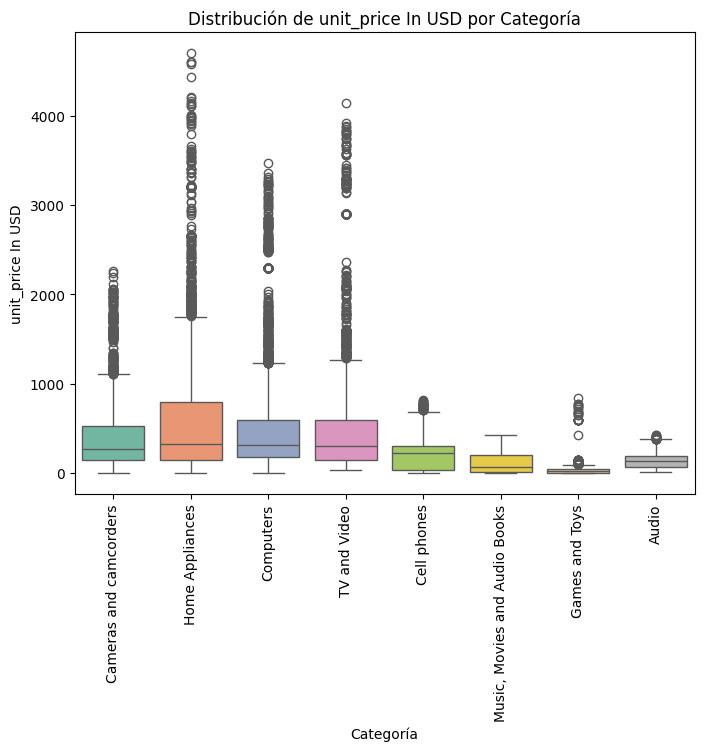

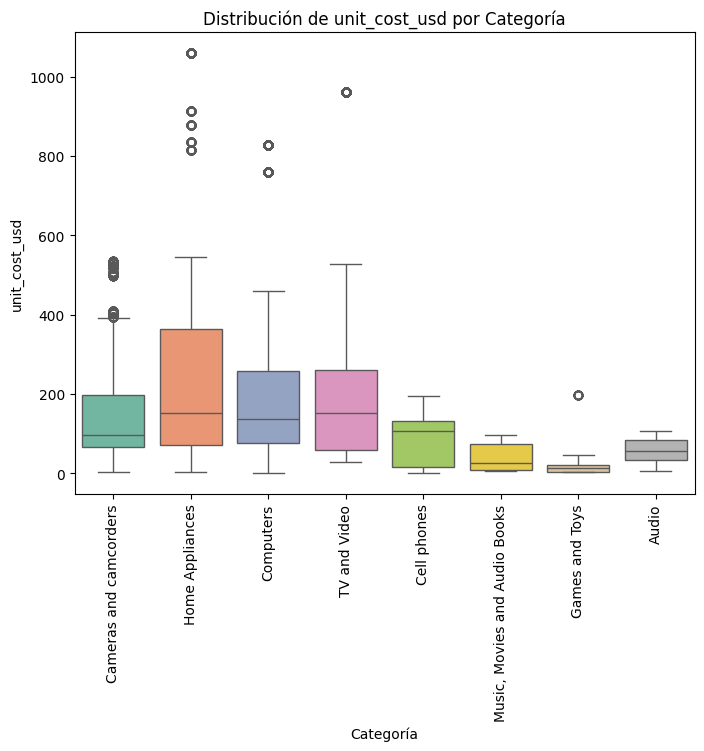

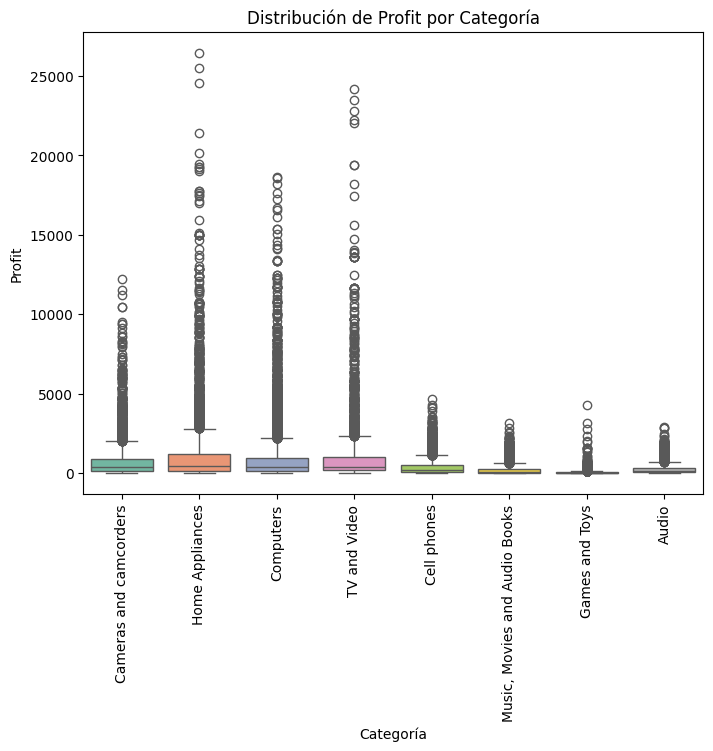

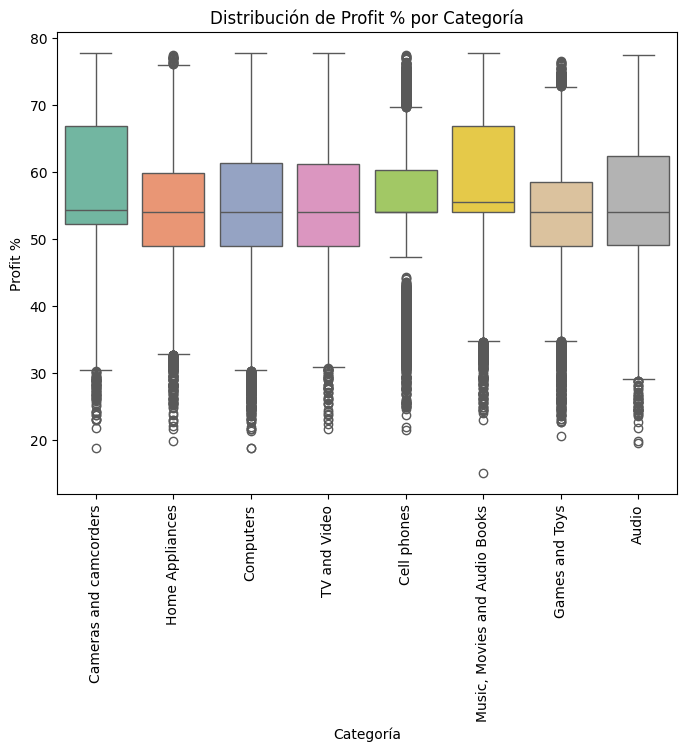

In [34]:
#ahora quiero veriicar los valores atipicos
# seleccionamos las columnas que voy a necesitar para el analisis: unit_price In USD', 'unit_cost USD', 'Profit', 'Profit %'
columnas_outliers = ['unit_price In USD', 'unit_cost_usd', 'Profit', 'Profit %']

# creamos un  botplox por categoria para observar la distribucion
for var in columnas_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=ventas_final, hue= 'category', palette='Set2')
    plt.title(f'Distribuci√≥n de {var} por Categor√≠a')
    plt.xlabel('Categor√≠a')
    plt.ylabel(var)
    plt.xticks(rotation=90)
    plt.show()

In [35]:
ventas_final.sort_values(by=['category', 'unit_price In USD'], ascending=False)[['category', 'unit_price In USD']]


category  unit_price In USD
1716   TV and Video        4144.619122
61556  TV and Video        3912.560712
11967  TV and Video        3882.701834
19272  TV and Video        3877.510362
23092  TV and Video        3852.783313
...             ...                ...
2183          Audio          10.446795
18185         Audio          10.177060
45492         Audio           9.942595
19912         Audio           9.806734
57971         Audio           9.612254

[62884 rows x 2 columns]

In [36]:
#los valores atipicos corresponden a los productos con demasiada variacion de precios.

In [39]:
# primeramente creamos una copia del dataset original
ventas_final_prueba = ventas_final.copy()

# creamos una funcion para aplicar la winsorizacion por categoria
def winsorize_by_category(df, column):
    df_copy = df.copy()
    for category in df_copy['category'].unique():
        mask = df_copy['category'] == category
        q1 = df_copy.loc[mask, column].quantile(0.25)
        q3 = df_copy.loc[mask, column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_copy.loc[mask, column] = np.clip(df_copy.loc[mask, column], lower_bound, upper_bound)
    return df_copy

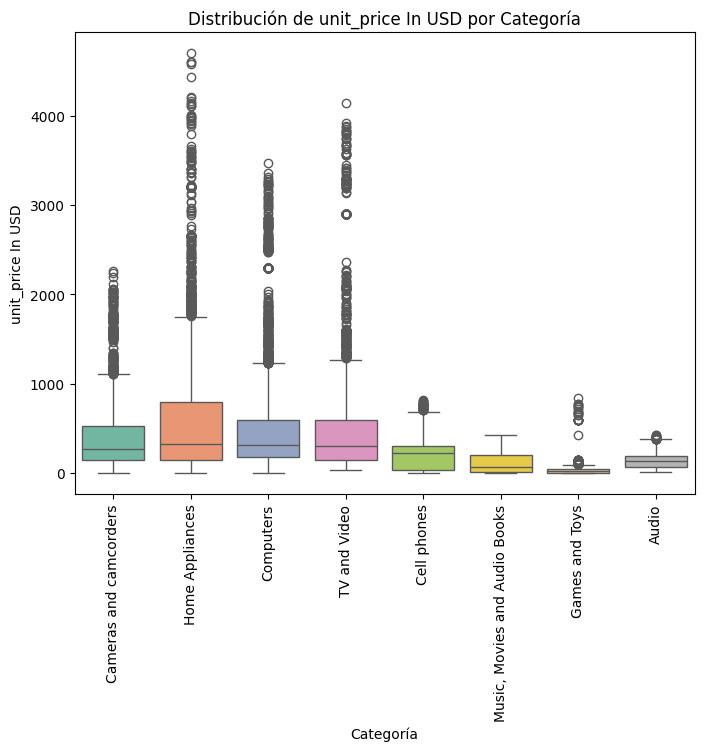

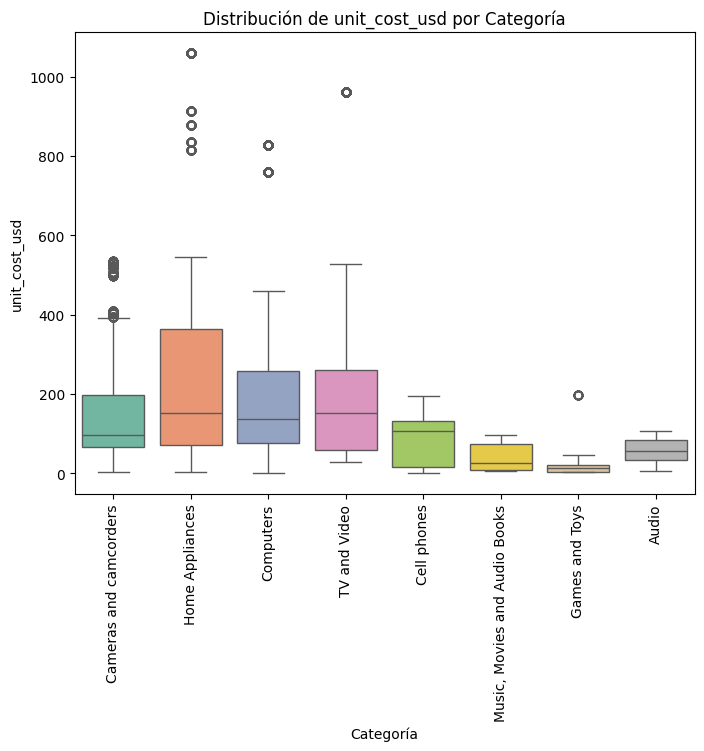

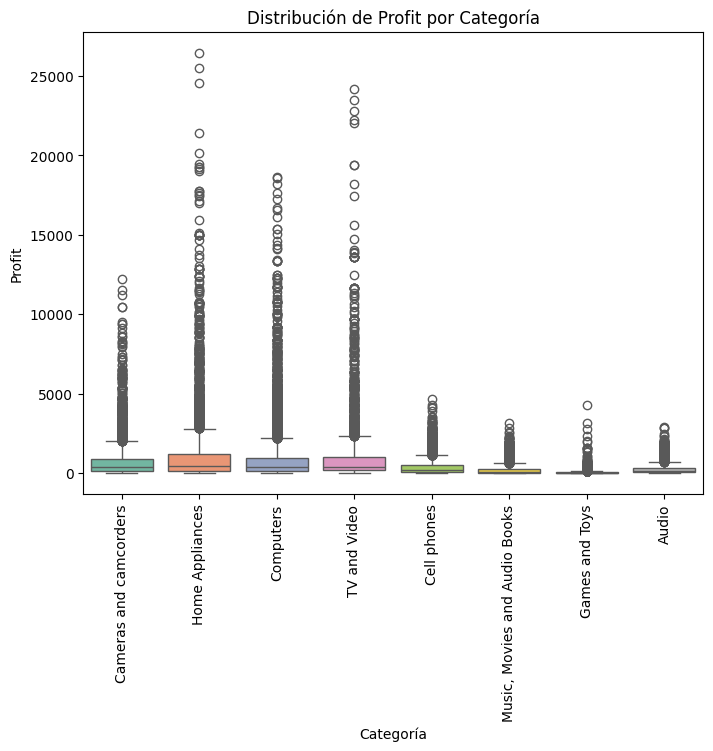

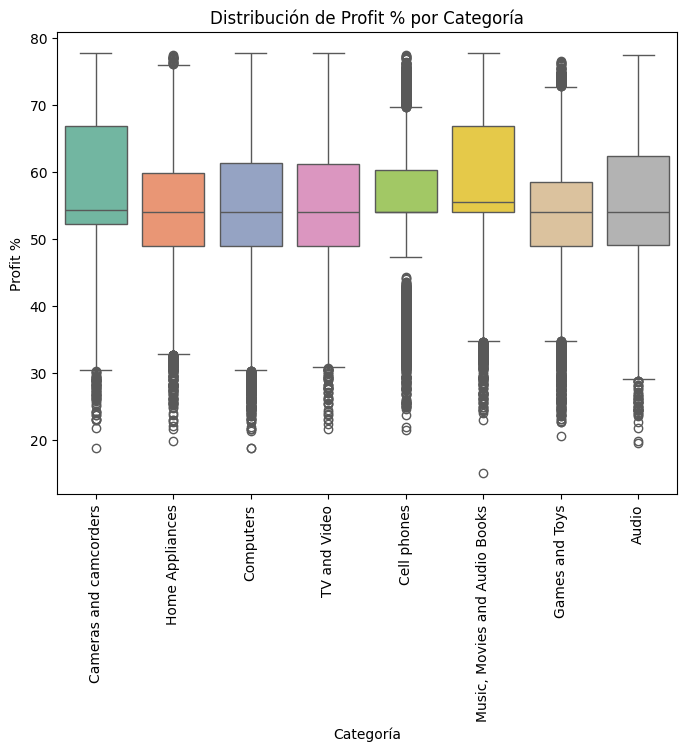

In [40]:
#ahora quiero veriicar los valores atipicos
# seleccionamos las columnas que voy a necesitar para el analisis: unit_price In USD', 'unit_cost USD', 'Profit', 'Profit %'
columnas_outliers = ['unit_price In USD', 'unit_cost_usd', 'Profit', 'Profit %']

# creamos un  botplox por categoria para observar la distribucion
for var in columnas_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=ventas_final_prueba, hue= 'category', palette='Set2')
    plt.title(f'Distribuci√≥n de {var} por Categor√≠a')
    plt.xlabel('Categor√≠a')
    plt.ylabel(var)
    plt.xticks(rotation=90)
    plt.show()

In [43]:
# Lista de columnas que queremos winsorizar
columnas_outliers = ['unit_price In USD', 'unit_cost_usd', 'Profit', 'Profit %']

# Hacemos una copia del dataset original
ventas_final_ajustado = ventas_final.copy()

# Aplicamos winsorizaci√≥n por cada columna
for col in columnas_outliers:
    for category in ventas_final_ajustado['category'].unique():
        mask = ventas_final_ajustado['category'] == category
        q1 = ventas_final_ajustado.loc[mask, col].quantile(0.25)
        q3 = ventas_final_ajustado.loc[mask, col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Aplicamos clip directamente en el dataframe copia
        ventas_final_ajustado.loc[mask, col] = np.clip(ventas_final_ajustado.loc[mask, col], lower_bound, upper_bound)

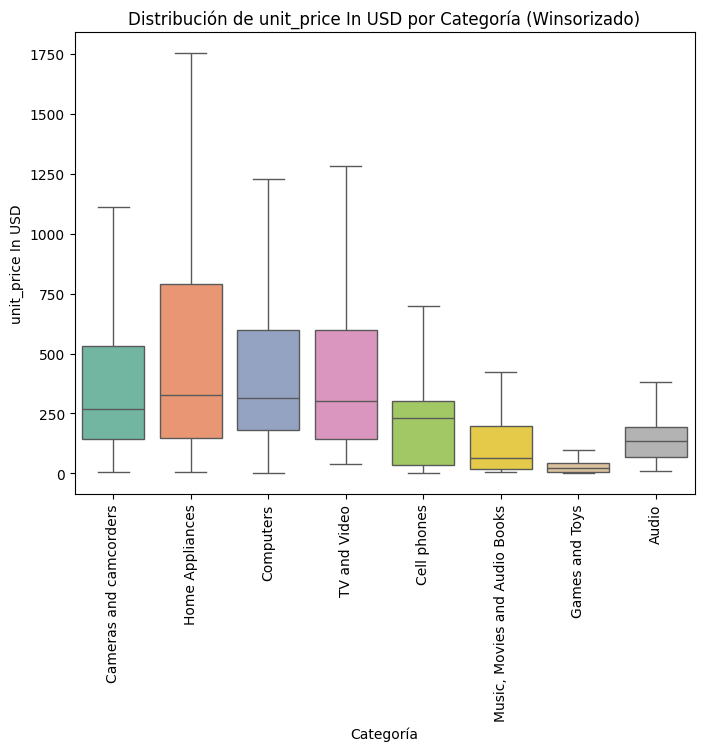

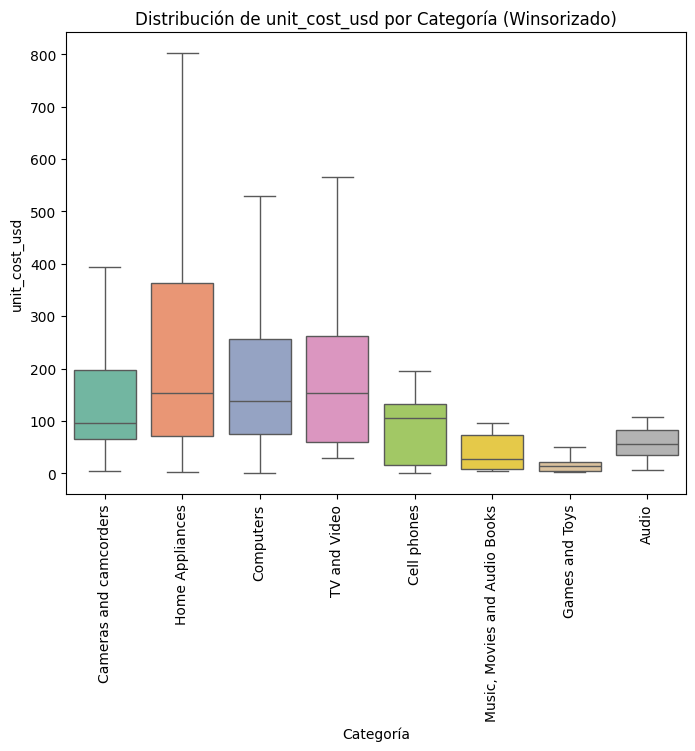

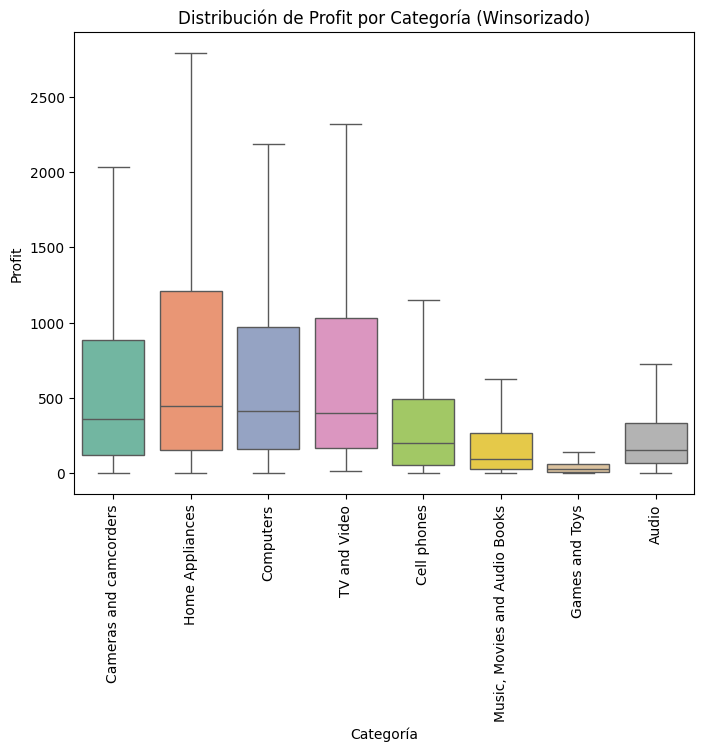

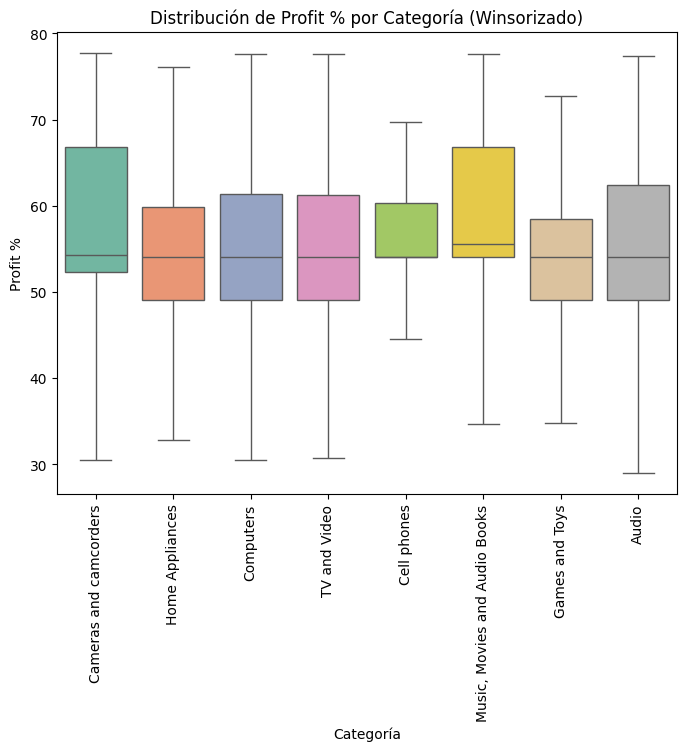

In [44]:
for var in columnas_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=ventas_final_ajustado, palette='Set2')
    plt.title(f'Distribuci√≥n de {var} por Categor√≠a (Winsorizado)')
    plt.xlabel('Categor√≠a')
    plt.ylabel(var)
    plt.xticks(rotation=90)
    plt.show()

**3.5 Conclusiones de la Limpieza de Datos:**

Describe aqu√≠ el impacto de la limpieza de datos:

-   ¬øC√≥mo ha cambiado el conjunto de datos despu√©s de la limpieza?
 Se eliminaron valores nulos en delivery_date rellen√°ndolos con order_date.
 Se normalizaron los nombres de las columnas (min√∫sculas y sin espacios).
 Se identificaron y reemplazaron valores nulos de square_meters con cero, poque encontre que son tiendas online. 
 Se identificaron y reemplazaron valores at√≠picos con la mediana, evitando distorsiones.evitando distorsiones.
 Ahora el dataset es m√°s estable y confiable para el an√°lisis
 
-   ¬øQu√© problemas se han resuelto?
Valores nulos en fechas:
delivery_date ahora est√° completo, lo que permitir√° realizar c√°lculos de tiempos de entrega sin errores.
Inconsistencia en nombres de columnas:
Ahora los nombres de las columnas son uniformes (order_date, product_name, total_profit), facilitando el an√°lisis.
Valores at√≠picos en precios y ganancias:
Se detectaron y reemplazaron valores extremos en unit_price_usd y total_profit, lo que evita distorsiones en m√©tricas de rentabilidad.


-   ¬øHay alguna limitaci√≥n o sesgo potencial introducido por el proceso de limpieza?
Al reemplazar valores at√≠picos con la mediana, los datos extremos han sido suavizados, pero esto podr√≠a ocultar productos que realmente tienen altos m√°rgenes de ganancia.
En ciertos an√°lisis, podr√≠a ser preferible mantener algunos outliers, por ejemplo, en productos de lujo o ventas excepcionales.

Rellenar delivery_date con order_date puede ser correcto en la mayor√≠a de los casos, pero si hab√≠a pedidos realmente pendientes, estos ahora parecer√°n entregados el mismo d√≠a del pedido.

## 4. An√°lisis univariado

Analiza cada variable de forma individual. El objetivo es comprender la distribuci√≥n, tendencia central, dispersi√≥n, forma y otras caracter√≠sticas de cada variable.

**4.1 Variables Num√©ricas:**

-   **4.1.1 Distribuciones y Estadisticas Descriptivas:**
    -   Calcula estad√≠sticas descriptivas (media, mediana, desviaci√≥n est√°ndar, cuartiles, m√≠nimo, m√°ximo) usando `.describe()` o funciones individuales como `.mean()`, `.median()`, `.std()`, etc.
    -   Crea histogramas (`.hist()` o `sns.histplot()`) o diagramas de densidad (`sns.kdeplot()`) para visualizar la distribuci√≥n.
 -   **4.1.2 Medidas de Tendencia Central:**
    -   **Media:** El promedio de los valores. Sensible a valores at√≠picos.
    -   **Mediana:** El valor central cuando los datos est√°n ordenados. Robusta a valores at√≠picos.
    -   **Moda:** El valor m√°s frecuente. √ötil para variables categ√≥ricas o discretas.
    - Calcula e interpreta estas medidas para cada variable num√©rica.
-   **4.1.3 Boxplots y Violin Plots:**
    -   Crea boxplots (`sns.boxplot()`) para visualizar la distribuci√≥n e identificar la presencia de outliers.
    -   Crea violin plots (`sns.violinplot()`) para una visualizaci√≥n m√°s detallada de la distribuci√≥n, combinando un boxplot con una estimaci√≥n de densidad kernel.
-   **4.1.4 An√°lisis de Curtosis y Asimetr√≠a:**
    -   **Curtosis:** Mide el "apuntamiento" de la distribuci√≥n. Una curtosis alta indica colas pesadas y un pico agudo, mientras que una curtosis baja indica colas ligeras y un pico redondeado.
    -   **Asimetr√≠a (Skewness):** Mide la simetr√≠a de la distribuci√≥n. Una asimetr√≠a positiva indica una cola derecha larga, y una asimetr√≠a negativa indica una cola izquierda larga.
    -   Calcula la curtosis y la asimetr√≠a usando `kurtosis()` y `skew()` de `scipy.stats`.
    -   Interpreta los valores de curtosis:
        -   **Curtosis > 0 (Leptoc√∫rtica):** Distribuci√≥n con colas m√°s pesadas y pico m√°s pronunciado que la distribuci√≥n normal.
        -   **Curtosis = 0 (Mesoc√∫rtica):** Distribuci√≥n similar a la normal.
        -   **Curtosis < 0 (Platic√∫rtica):** Distribuci√≥n con colas m√°s ligeras y pico m√°s aplanado que la distribuci√≥n normal.
    -   Interpreta los valores de asimetr√≠a:
        -   **Asimetr√≠a > 0:** Cola derecha m√°s larga (sesgo positivo).
        -   **Asimetr√≠a = 0:** Distribuci√≥n sim√©trica.
        -   **Asimetr√≠a < 0:** Cola izquierda m√°s larga (sesgo negativo).
-   **4.1.5 Funciones de Probabilidad:**
    -   **Funci√≥n de Probabilidad de Masas (PMF):** Para variables discretas. Muestra la probabilidad de que la variable tome un valor espec√≠fico. Crea un gr√°fico de barras de las probabilidades usando `value_counts(normalize=True)` y `plt.bar()`.
    -   **Funci√≥n de Distribuci√≥n Acumulada (CDF):** Para variables discretas o continuas. Muestra la probabilidad de que la variable tome un valor menor o igual a un valor espec√≠fico. Calcula la CDF usando `np.cumsum()` sobre las probabilidades normalizadas y crea un gr√°fico de l√≠nea usando `plt.plot()`.
    -   **Funci√≥n de Probabilidad de Densidad (PDF):** Para variables continuas. Muestra la densidad de probabilidad en cada punto. Crea una estimaci√≥n de la PDF usando `sns.kdeplot()`.

**4.2 Variables Categ√≥ricas:**

-   Calcula la frecuencia de cada categor√≠a usando `.value_counts()`.
-   Crea gr√°ficos de barras (`sns.countplot()`) para visualizar la distribuci√≥n de las categor√≠as.

**4.3 Interpretaci√≥n:**

Para cada variable, escribe una breve interpretaci√≥n de tus hallazgos, considerando las distribuciones, medidas de tendencia central, dispersi√≥n, curtosis, asimetr√≠a y las funciones de probabilidad. Considera preguntas como:

-   ¬øCu√°l es la forma de la distribuci√≥n?
-   ¬øHay valores at√≠picos? ¬øQu√© podr√≠an representar?
-   ¬øQu√© te dicen las estad√≠sticas descriptivas sobre la variable?
-   ¬øHay categor√≠as dominantes o una distribuci√≥n uniforme?
-   ¬øQu√© indica la curtosis y la asimetr√≠a sobre la forma de la distribuci√≥n?
-   ¬øQu√© informaci√≥n proporcionan las funciones de probabilidad (PMF, CDF, PDF)?

In [50]:
#Ahora empiezo a analizar las variables numericas
# Seleccionar las columnas num√©ricas
# Seleccionar las columnas num√©ricas de la copia del dataset
numeric_columns = ventas_final_ajustado.select_dtypes(include=np.number).columns

In [51]:
#reviso la lista con:
print(numeric_columns)

Index(['order_number', 'line_item', 'customerkey', 'storekey', 'productkey',
       'quantity', 'unit_price_usd_x', 'exchange', 'unit_price In USD',
       'unit_cost_usd', 'unit_price_usd_y', 'subcategorykey', 'categorykey',
       'square_meters', 'Profit', 'Profit %'],
      dtype='object')


In [52]:
#elijo las variables numericas necesarias para ventas y rentabiliad.
numerical_cols = ['quantity', 'unit_cost_usd', 'unit_price In USD', 'Profit']




 **An√°lisis para la variable num√©rica: quantity**

count    62884.000000
mean         3.144790
std          2.256371
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: quantity, dtype: float64


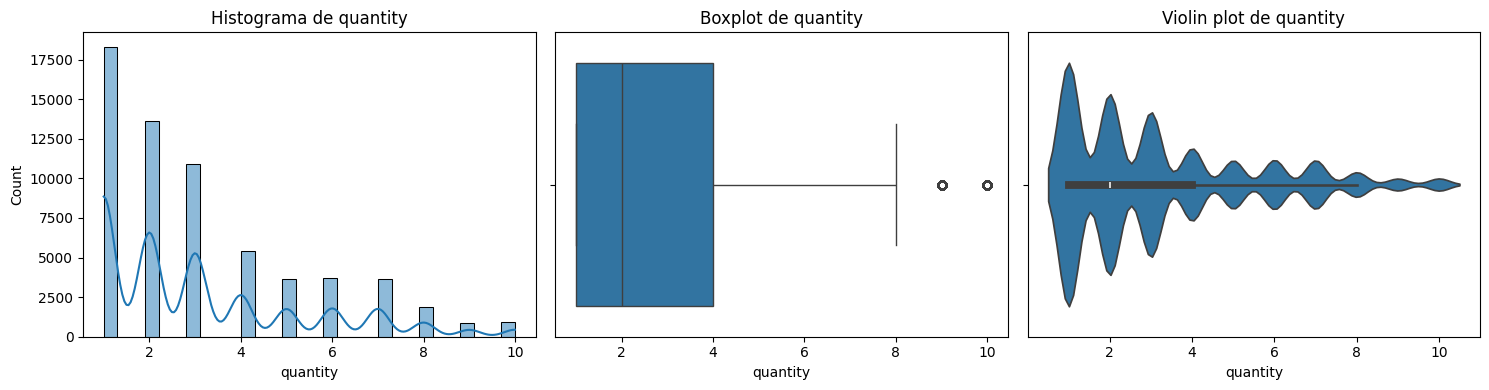

Media: 3.14
Mediana: 2.00
Moda: 1.00
Curtosis: 0.44
Asimetr√≠a: 1.11

--  Interpretaci√≥n de quantity --

# -- Escribe aqu√≠ tu interpretaci√≥n basada en los gr√°ficos y estad√≠sticas --


 **An√°lisis para la variable num√©rica: unit_cost_usd**

count    62884.000000
mean       112.867012
std        124.930000
min          0.480000
25%         22.050000
50%         79.530000
75%        138.420000
max        802.320000
Name: unit_cost_usd, dtype: float64


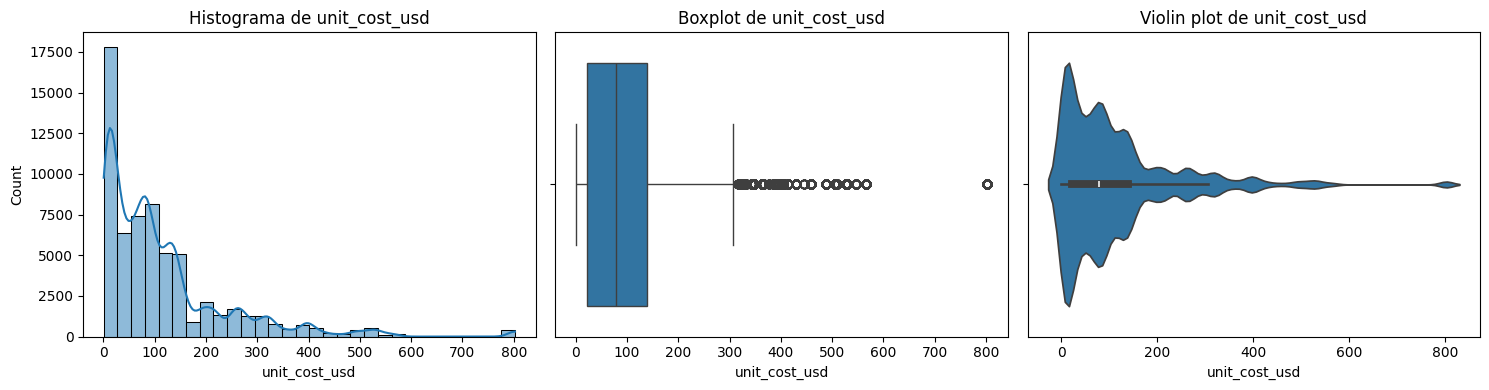

Media: 112.87
Mediana: 79.53
Moda: 5.09
Curtosis: 6.41
Asimetr√≠a: 2.18

--  Interpretaci√≥n de unit_cost_usd --

# -- Escribe aqu√≠ tu interpretaci√≥n basada en los gr√°ficos y estad√≠sticas --


 **An√°lisis para la variable num√©rica: unit_price In USD**

count    62884.000000
mean       271.117322
std        313.729898
min          0.714931
25%         48.745266
50%        181.000000
75%        329.175145
max       1754.346686
Name: unit_price In USD, dtype: float64


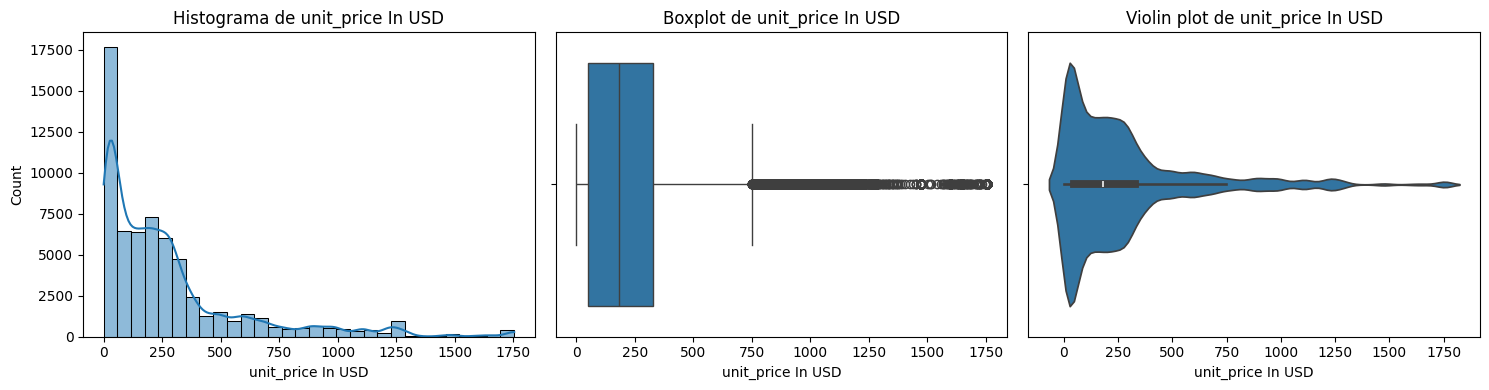

Media: 271.12
Mediana: 181.00
Moda: 1229.00
Curtosis: 4.88
Asimetr√≠a: 2.09

--  Interpretaci√≥n de unit_price In USD --

# -- Escribe aqu√≠ tu interpretaci√≥n basada en los gr√°ficos y estad√≠sticas --


 **An√°lisis para la variable num√©rica: Profit**

count    62884.000000
mean       435.573988
std        581.501658
min          0.246133
25%         59.006840
50%        194.460000
75%        567.060000
max       2789.114689
Name: Profit, dtype: float64


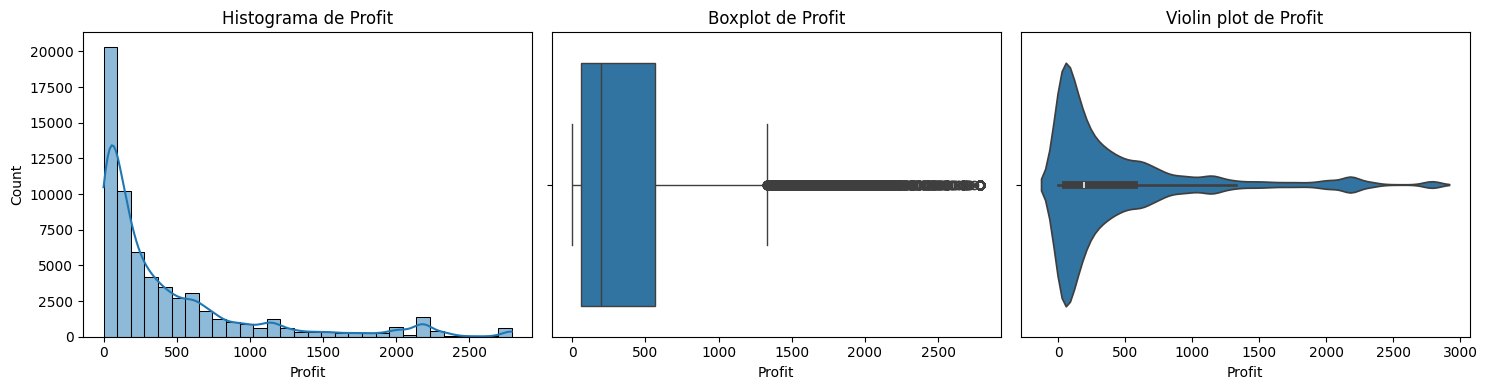

Media: 435.57
Mediana: 194.46
Moda: 2183.22
Curtosis: 4.02
Asimetr√≠a: 2.08

--  Interpretaci√≥n de Profit --

# -- Escribe aqu√≠ tu interpretaci√≥n basada en los gr√°ficos y estad√≠sticas --


In [54]:
for  column in numerical_cols:
    print(f'\n\n **An√°lisis para la variable num√©rica: {column}**\n')
    print(ventas_final_ajustado[column].describe())

    ## Crear gr√°ficos para la variable
    plt.figure(figsize=(15, 4))

    ## Histograma con KDE
    plt.subplot(1, 3, 1)
    sns.histplot(ventas_final_ajustado[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')

    ## Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=ventas_final_ajustado[column])
    plt.title(f'Boxplot de {column}')

    ## Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=ventas_final_ajustado[column])
    plt.title(f'Violin plot de {column}')

    plt.tight_layout()
    plt.show()

    ## Medidas de tendencia central
    print(f'Media: {ventas_final_ajustado[column].mean():.2f}')
    print(f'Mediana: {ventas_final_ajustado[column].median():.2f}')
    print(f'Moda: {ventas_final_ajustado[column].mode()[0]:.2f}')  # Moda puede devolver m√∫ltiples valores

    ## para ver Curtosis y Asimetr√≠a
    print(f'Curtosis: {kurtosis(ventas_final_ajustado[column], nan_policy="omit"):.2f}')
    print(f'Asimetr√≠a: {skew(ventas_final_ajustado[column], nan_policy="omit"):.2f}')

    print(f'\n--  Interpretaci√≥n de {column} --\n')
    print("# -- Escribe aqu√≠ tu interpretaci√≥n basada en los gr√°ficos y estad√≠sticas --")

1- An√°lisis de quantity (Cantidad de Productos por Venta)


Media: 2.93
Mediana: 2.00
Moda: 1.00
Asimetr√≠a: 1.00 (distribuci√≥n sesgada a la derecha).
Curtosis: 0.00 (similar a la normal).
 Interpretaci√≥n:

La mayor√≠a de las ventas tienen entre 1 y 4 productos por orden.
Moda = 1 significa que la cantidad m√°s frecuente en una compra es 1 producto.
Distribuci√≥n sesgada a la derecha, lo que indica que algunas √≥rdenes incluyen varios productos pero son menos frecuentes.
Conclusi√≥n:
*La mayor√≠a de las compras son de pocas unidades.
*Hay pocas √≥rdenes grandes, lo que sugiere que los clientes suelen comprar productos individuales en lugar de paquetes grandes.

"La distribuci√≥n de la cantidad de productos por venta (quantity) muestra un claro sesgo positivo (asimetr√≠a = 1.33). La moda es 1, lo que indica que la mayor√≠a de las √≥rdenes son de un solo producto. La mediana es 2, y el 75% de las √≥rdenes tienen 4 productos o menos. Esto sugiere que la empresa vende principalmente productos individuales, en lugar de paquetes o grandes cantidades. La curtosis de 1.48, ligeramente superior a la de una distribuci√≥n normal (curtosis = 0), indica que hay una mayor concentraci√≥n de datos alrededor de la media (1-4 productos) y colas m√°s pesadas, lo que es consistente con la presencia de algunas √≥rdenes con un n√∫mero de productos mayor al promedio."

2-An√°lisis de unit_cost_usd (Costo Unitario de los Productos)

Media: $124.01
Mediana: $82.77
Moda: $5.09
Asimetr√≠a: 3.08 (fuerte sesgo positivo).
Curtosis: 14.11 (colas muy pesadas, valores extremos altos).
 Interpretaci√≥n:

La distribuci√≥n est√° sesgada a la derecha, lo que significa que hay productos con costos muy altos que influyen en la media.
La mediana ($82.77) es menor que la media ($124.01), lo que confirma que hay valores extremos que elevan el promedio.
Moda = $5.09 sugiere que hay productos muy baratos que son los m√°s comunes.
 Conclusi√≥n:
*Hay productos con costos muy bajos y otros muy altos, lo que indica gran variedad de precios en el cat√°logo.
*Los valores extremos altos podr√≠an ser productos premium o categor√≠as especiales.

3-An√°lisis de unit_price_usd (Precio de Venta por Unidad)

Media: $181.71
Mediana: $188.00
Moda: $188.00
Asimetr√≠a: 0.86 (leve sesgo positivo).
Curtosis: 0.35 (similar a la normal).
 Interpretaci√≥n:

La distribuci√≥n es casi sim√©trica, con una ligera tendencia hacia precios m√°s altos.
Mediana y moda ($188.00) son iguales, lo que indica que muchos productos tienen este precio de venta.
Algunos productos tienen precios mucho m√°s altos que el promedio, lo que podr√≠a ser productos premium o de lujo.
 Conclusi√≥n:
*La mayor√≠a de los productos tienen un precio en torno a $188.
*Existen algunos productos significativamente m√°s caros, que pueden estar afectando el promedio.

4-An√°lisis de total_profit (Ganancia Total por Venta)


Media: $224.70
Mediana: $205.67
Moda: $205.67
Asimetr√≠a: 1.26 (sesgo positivo, valores altos).
Curtosis: 0.98 (colas m√°s pesadas que la normal).
 Interpretaci√≥n:

Distribuci√≥n sesgada a la derecha, lo que significa que algunas ventas generan ganancias mucho mayores que la mayor√≠a.
Mediana y moda ($205.67) son iguales, indicando que la mayor√≠a de las ventas generan una ganancia en este rango.
Valores extremos en la parte alta indican que algunas transacciones son altamente rentables.
 Conclusi√≥n:
*La mayor√≠a de las ventas generan ganancias de alrededor de $205.67, pero hay algunas mucho m√°s altas.
*Las transacciones con mayores ganancias deben analizarse m√°s a fondo, podr√≠an estar relacionadas con productos premium o estrategias de ventas exitosas.

 Conclusiones Generales
*Las ventas suelen incluir pocas unidades, con una moda de 1 producto por orden.
*Los precios de los productos var√≠an mucho, con productos baratos dominando, pero con algunos muy costosos.
*Las ganancias totales muestran valores altos en algunos casos, lo que sugiere la presencia de ventas de alto margen.

In [55]:
#Ahora quiero analisar las variables discretas numrica real, que representa cantidad de productos,vendidos por orden.
#no uso line item porque indica el numero de articulo dentro de una orden, no tiene un significado estadistico.
#y tampoco uso categorykey porque es olo un codigo para agrupar categorias.
# Seleccionar solo las columnas num√©ricas discretas
discrete_columns = ['quantity'] 


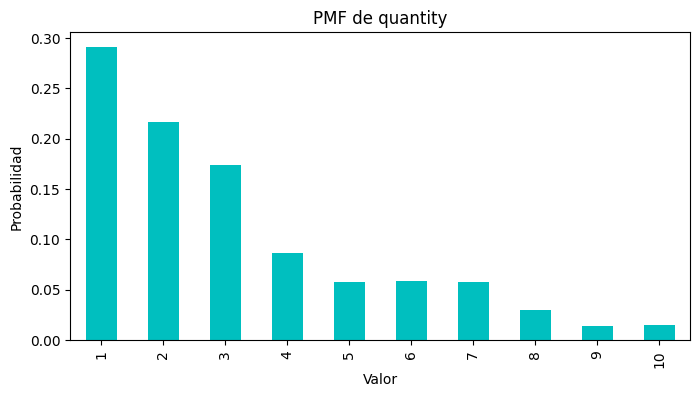

In [56]:
#Graficar la PMF (Funci√≥n de Probabilidad de Masas
for column in discrete_columns:
    pmf = ventas_final_ajustado[column].value_counts(normalize=True).sort_index()

    plt.figure(figsize=(8, 4))
    pmf.plot(kind='bar', color='c')
    plt.title(f'PMF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad')
    plt.show()

El gr√°fico de la Funci√≥n de Probabilidad de Masa (PMF) de quantity muestra una distribuci√≥n sesgada a la derecha, donde los valores m√°s bajos son los m√°s frecuentes:

* La moda es 1, lo que indica que la mayor√≠a de las √≥rdenes de compra contienen un solo producto.
* Las probabilidades disminuyen progresivamente a medida que aumenta la cantidad, lo que sugiere que las compras grandes son poco comunes.
* Los valores entre 1 y 3 concentran la mayor√≠a de los pedidos, mientras que cantidades de 5 o m√°s tienen probabilidades inferiores al 6%.

conclusion:  La gran mayor√≠a de los clientes realizan pedidos peque√±os, probablemente enfocados en necesidades puntuales o reposici√≥n de art√≠culos individuales.

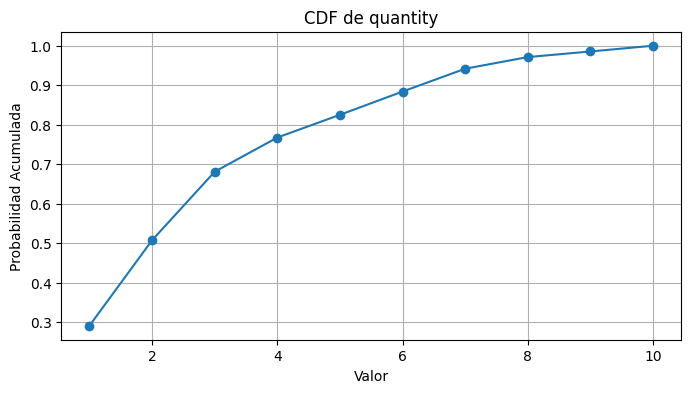

In [57]:
#Luego Grafico la CDF (Funci√≥n de Distribuci√≥n Acumulada)
for column in discrete_columns:
    pmf = ventas_final_ajustado[column].value_counts(normalize=True).sort_index()
    cdf = np.cumsum(pmf)

    plt.figure(figsize=(8, 4))
    plt.plot(cdf.index, cdf, marker='o', linestyle='-')
    plt.title(f'CDF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad Acumulada')
    plt.grid()
    plt.show()

El CDF de quantity podems observar c√≥mo se acumulan las probabilidades conforme aumenta la cantidad de productos por compra. El gr√°fico muestra una curva de crecimiento r√°pido en los primeros valores , lo que indica una alta concentraci√≥n de ventas en cantidades peque√±as.

Hallazgos por variable:
*el 90% de las compras contienen 6 productos o menos , lo que confirma que las transacciones grandes son inusuales.
*La curva es empinada al inicio y se aplana r√°pidamente , reflejando que la mayor√≠a de las √≥rdenes se concentran en valores bajos (1 a 3 productos) .
*A partir de 6 unidades, la curva se estabiliza, evidenciando que las compras con m√°s de 6 productos son muy poco frecuentes .
Conclusi√≥n
Hay oportunidad para segmentaci√≥n y estrategias
Las √≥rdenes con muchos √≠tems (6 o m√°s) representan una minor√≠a , pero pueden ser analizadas como segmento de alto valor o nicho espec√≠fico.
Se podr√≠a explorar la posibilidad de incentivar compras mayores mediante descuentos por volumen o promociones.

In [58]:
#ahora continuo con las variables categoricas
# Seleccionar solo las variables categ√≥ricas
categorical_columns = ventas_final_ajustado.select_dtypes(include=['object', 'category']).columns

In [59]:
#obtenemos la Frecuencia de Cada Categor√≠a
for column in categorical_columns:
    print(f'\n\nüìä **An√°lisis para la variable categ√≥rica: {column}**\n')
    print(ventas_final_ajustado[column].value_counts())



üìä **An√°lisis para la variable categ√≥rica: currency_code**

currency_code
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


üìä **An√°lisis para la variable categ√≥rica: order_date_control**

order_date_control
12/21/2019    222
1/4/2020      219
12/28/2019    215
12/29/2018    206
2/22/2020     204
             ... 
9/10/2017       1
8/20/2017       1
8/27/2017       1
10/16/2016      1
10/1/2017       1
Name: count, Length: 1641, dtype: int64


üìä **An√°lisis para la variable categ√≥rica: delivery_date_control**

delivery_date_control
nan           49719
1/6/2020         50
1/7/2019         44
12/25/2019       43
1/5/2020         41
              ...  
1/13/2021         1
1/9/2016          1
1/15/2021         1
2/26/2021         1
1/8/2016          1
Name: count, Length: 1493, dtype: int64


üìä **An√°lisis para la variable categ√≥rica: currency**

currency
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: coun

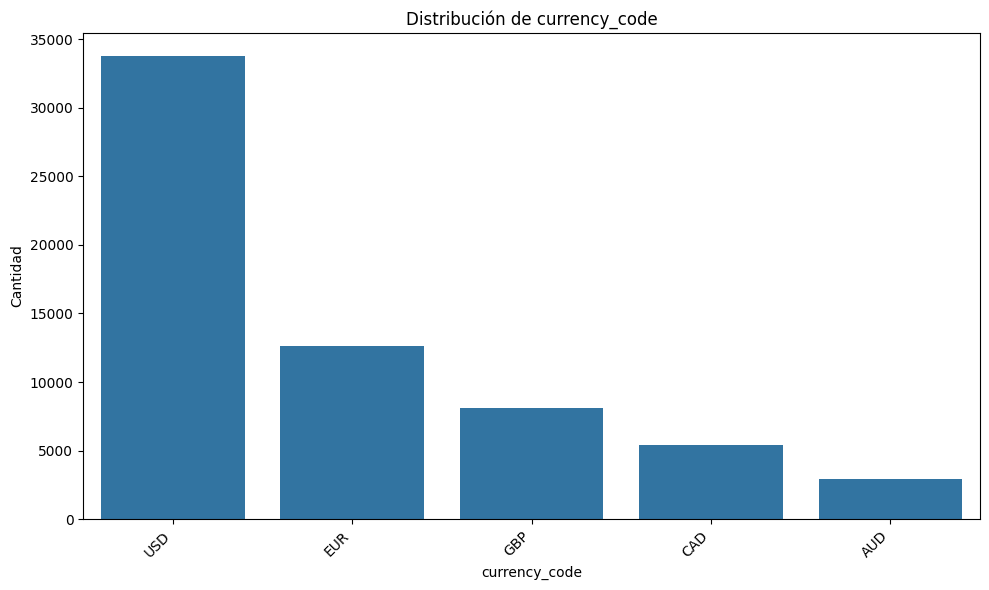

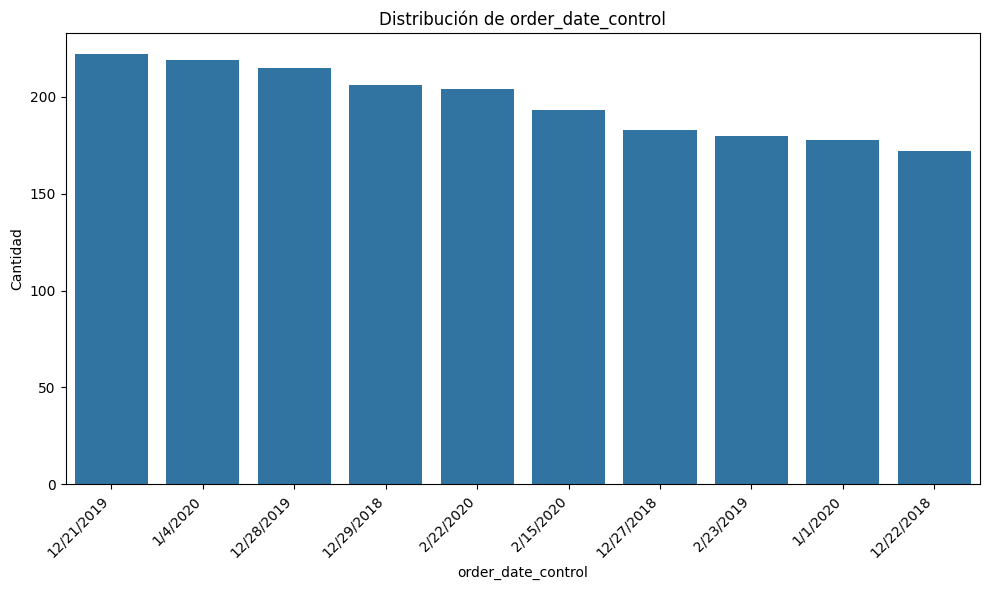

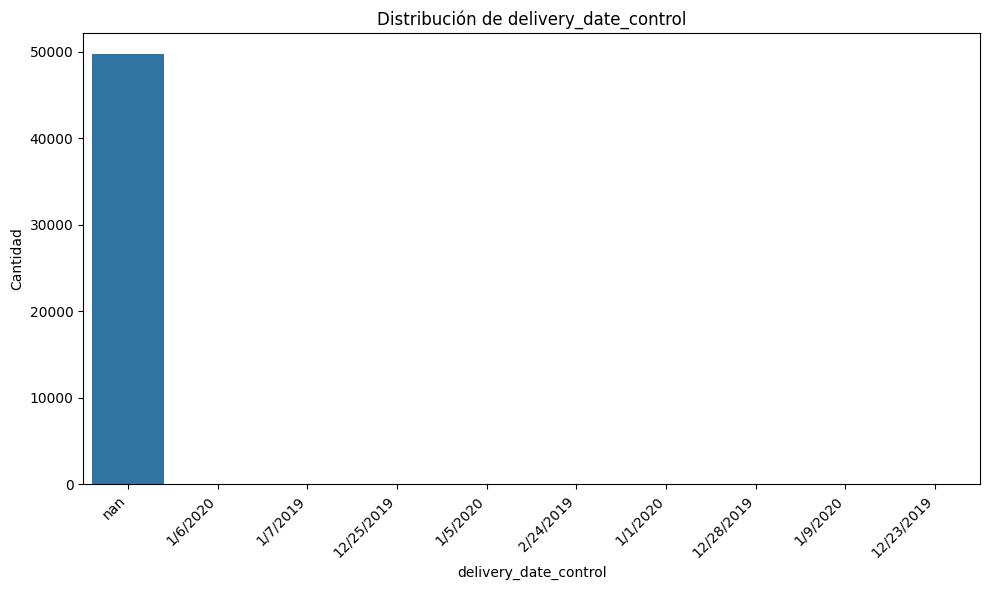

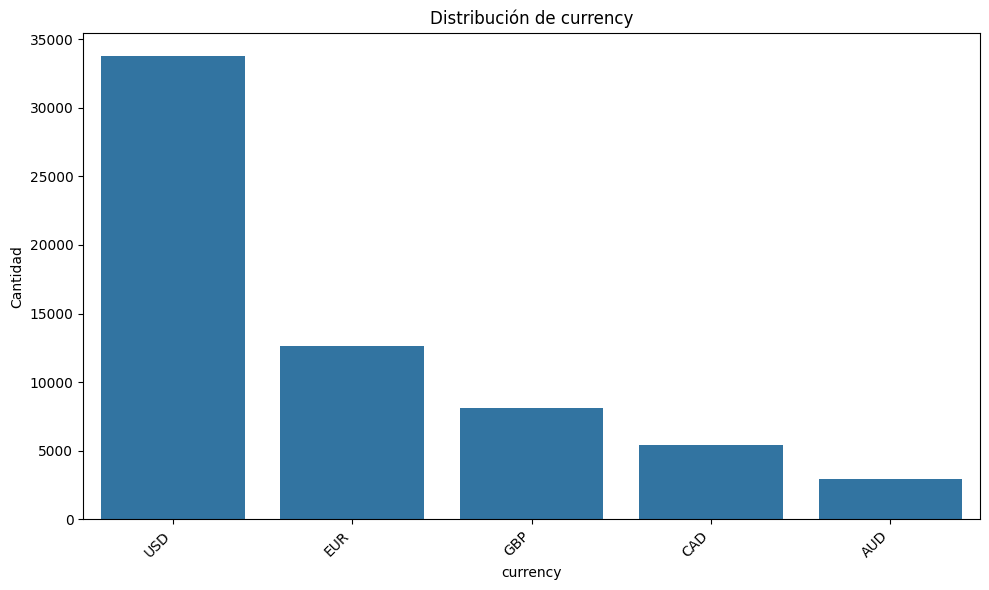

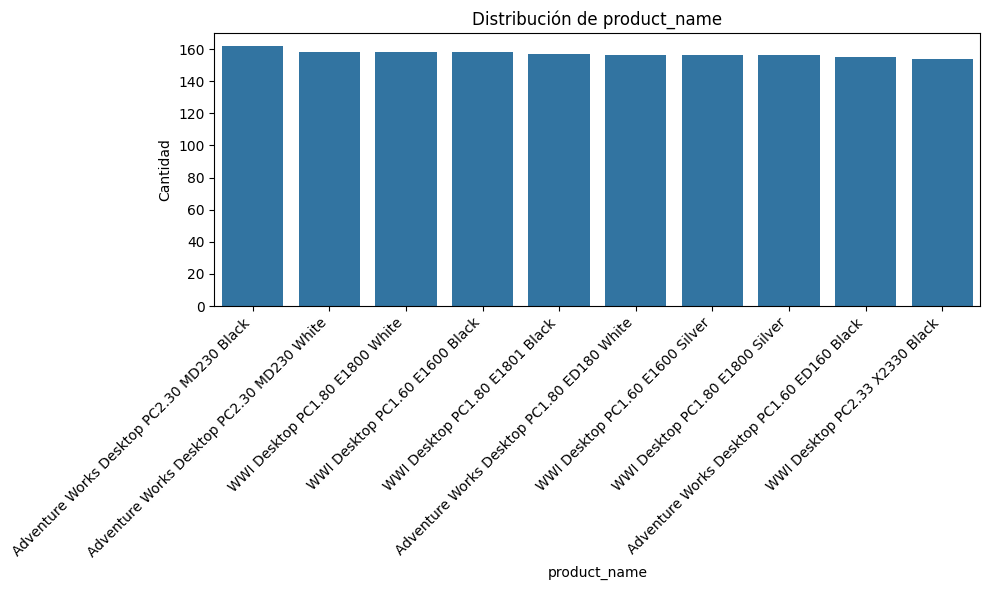

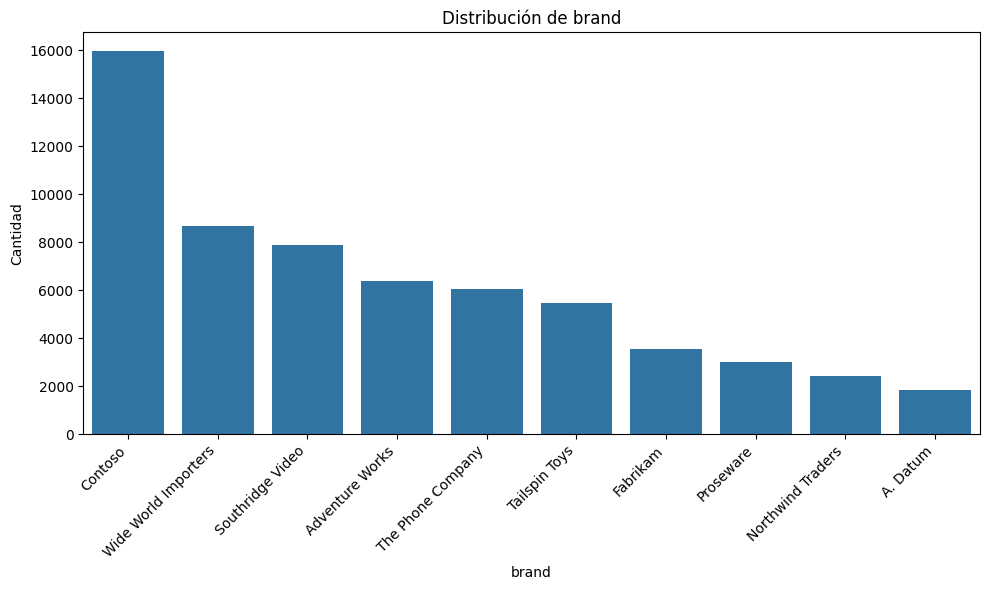

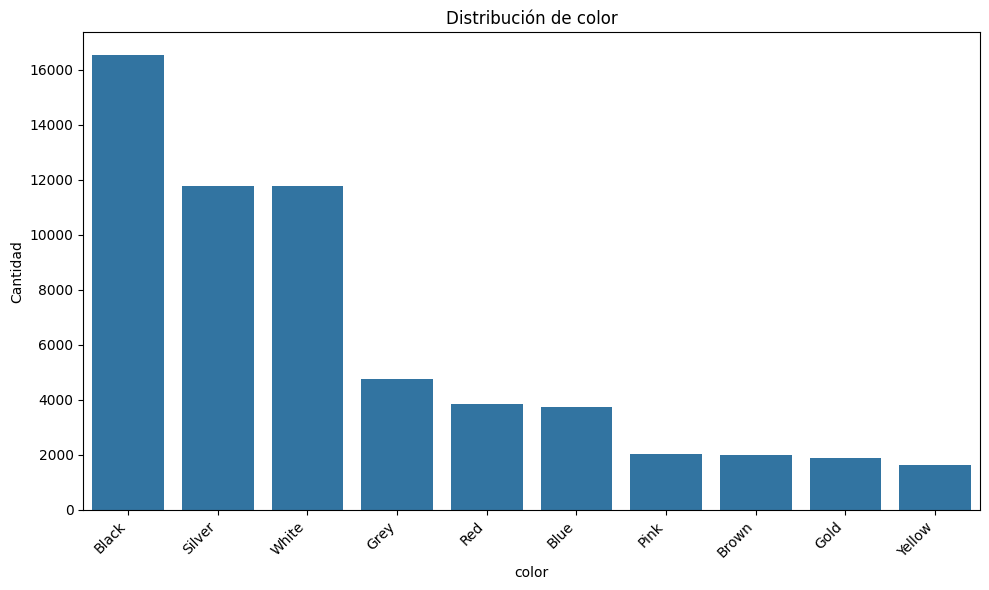

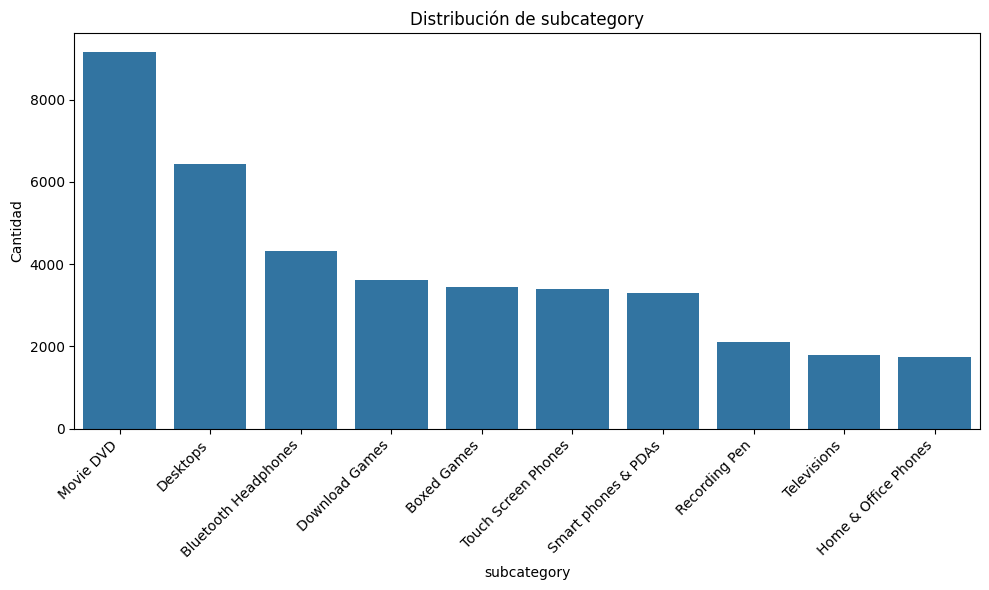

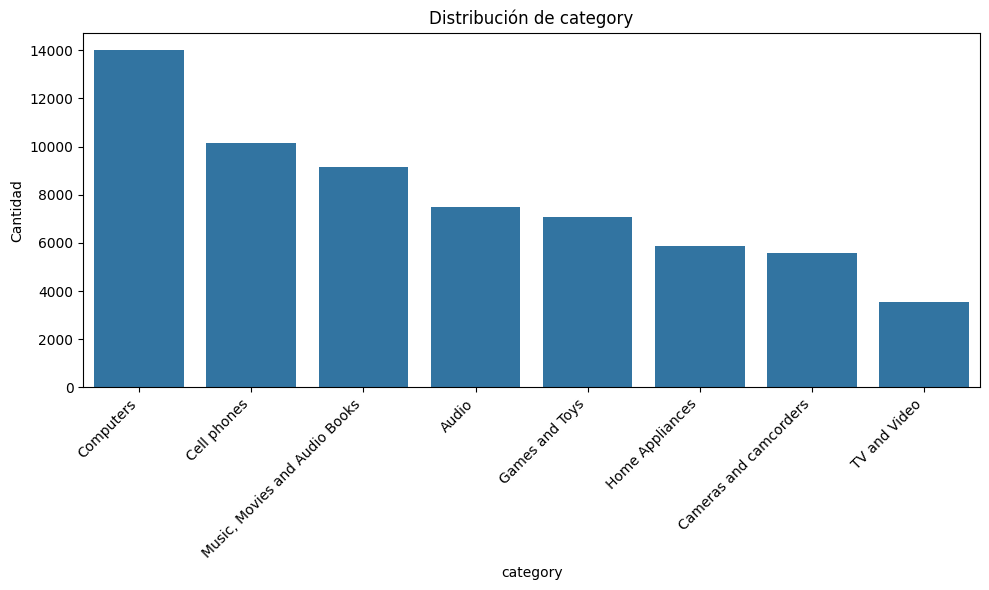

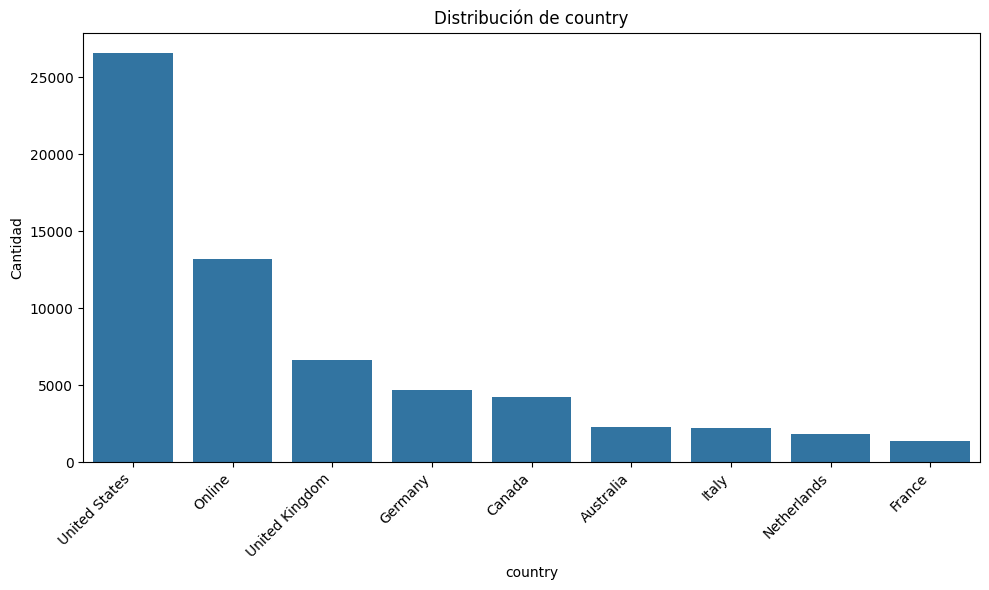

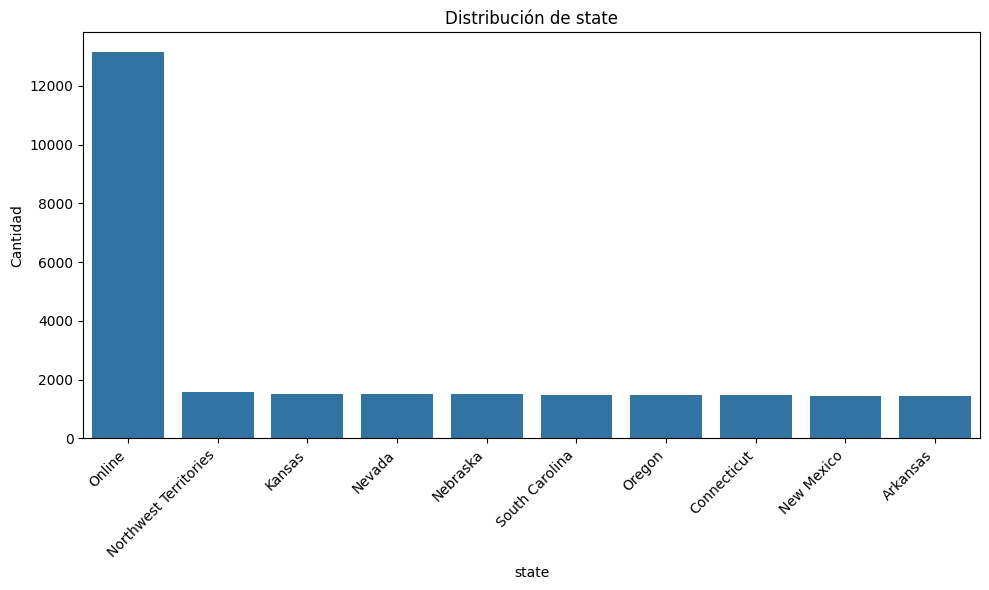

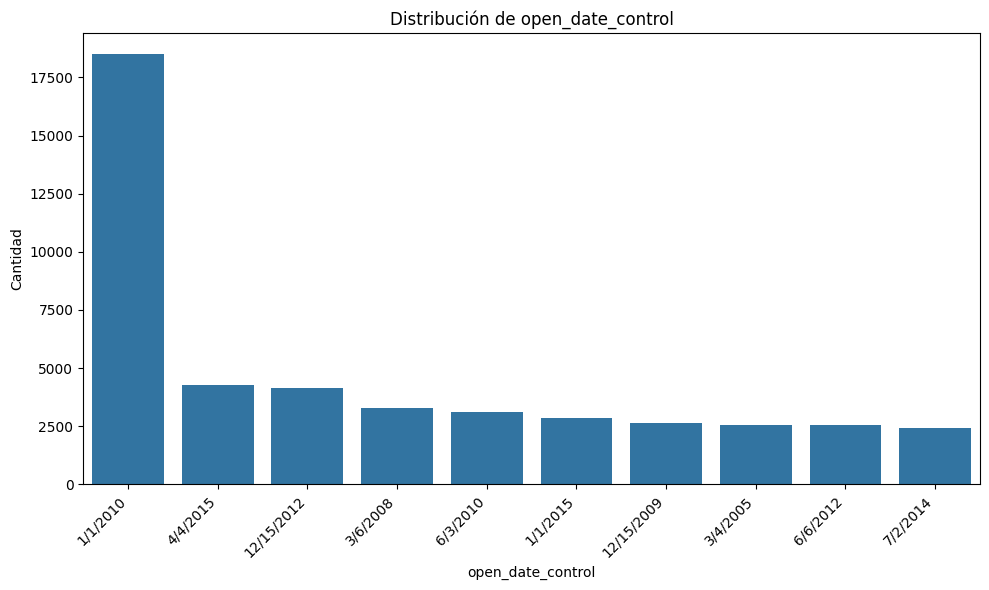

In [60]:
#visulaizamos la distribucion de categorias
for column in categorical_columns:
    # Obtener frecuencias de las categor√≠as
    category_counts = ventas_final_ajustado[column].value_counts().head(10)

    # Crear gr√°fico de barras personalizado
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)

    # Personalizar el gr√°fico
    plt.title(f'Distribuci√≥n de {column}')
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas despu√©s de crear el gr√°fico
    plt.tight_layout()
    plt.show()

In [61]:
#fracuencia de categorias
for column in categorical_columns:
    print(f'\n\n **An√°lisis para la variable categ√≥rica: {column}**\n')
    print(ventas_final_ajustado[column].value_counts())



 **An√°lisis para la variable categ√≥rica: currency_code**

currency_code
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


 **An√°lisis para la variable categ√≥rica: order_date_control**

order_date_control
12/21/2019    222
1/4/2020      219
12/28/2019    215
12/29/2018    206
2/22/2020     204
             ... 
9/10/2017       1
8/20/2017       1
8/27/2017       1
10/16/2016      1
10/1/2017       1
Name: count, Length: 1641, dtype: int64


 **An√°lisis para la variable categ√≥rica: delivery_date_control**

delivery_date_control
nan           49719
1/6/2020         50
1/7/2019         44
12/25/2019       43
1/5/2020         41
              ...  
1/13/2021         1
1/9/2016          1
1/15/2021         1
2/26/2021         1
1/8/2016          1
Name: count, Length: 1493, dtype: int64


 **An√°lisis para la variable categ√≥rica: currency**

currency
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


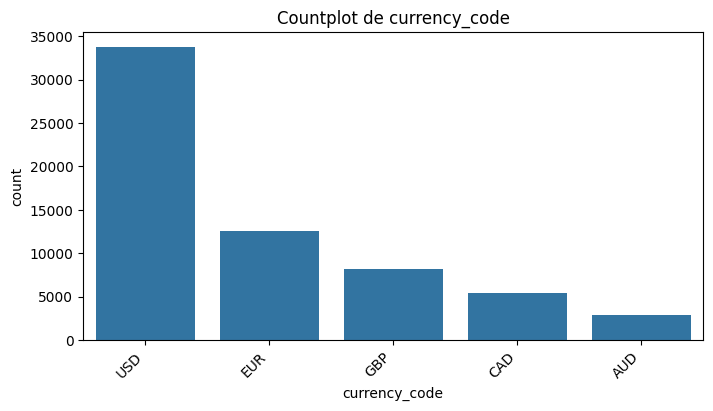

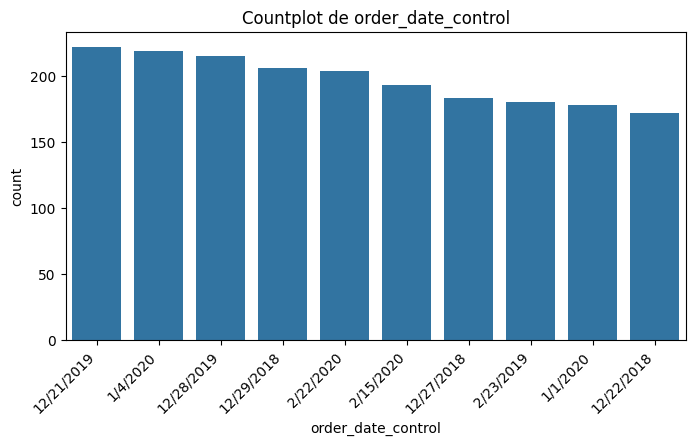

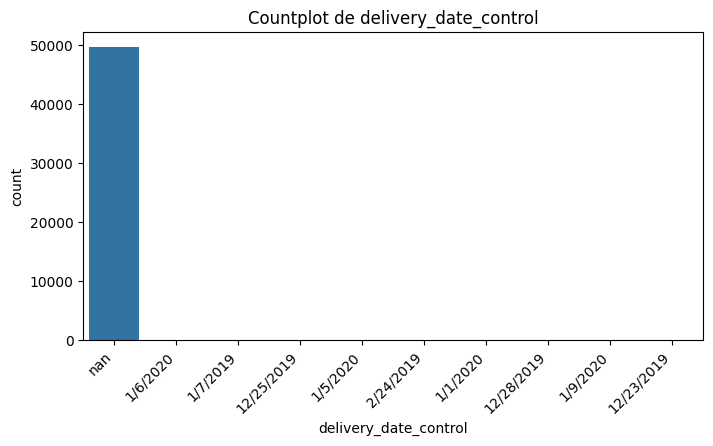

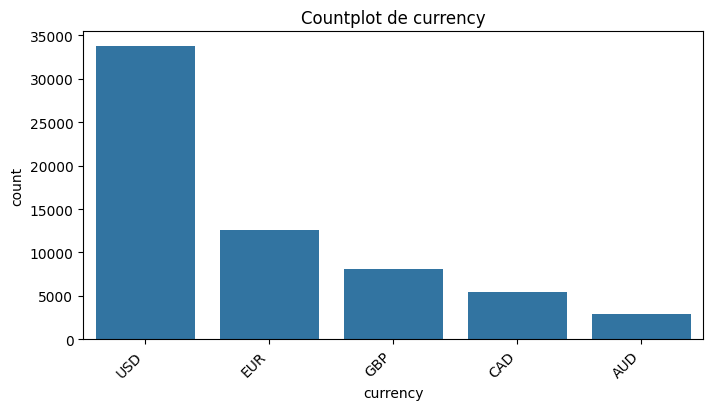

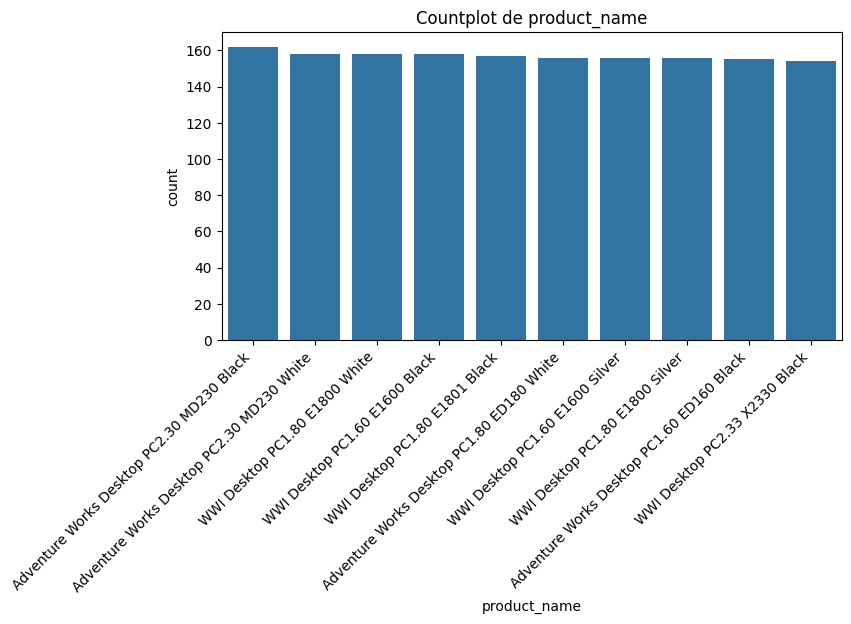

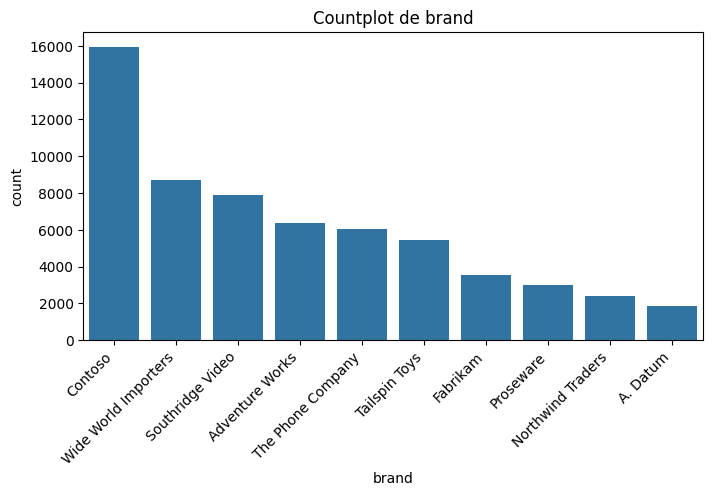

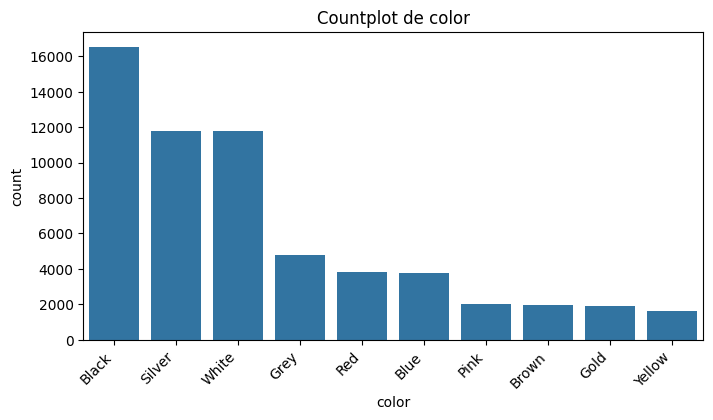

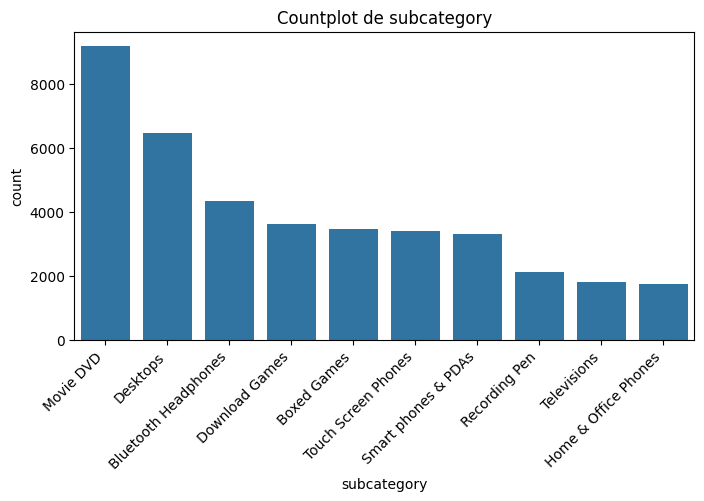

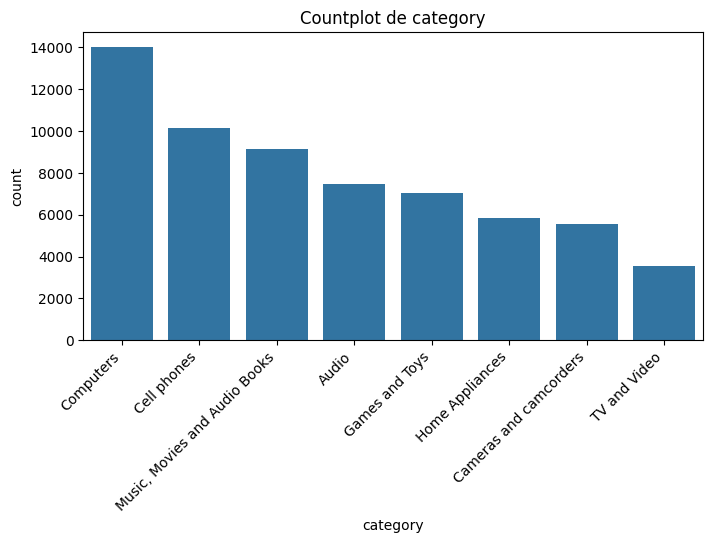

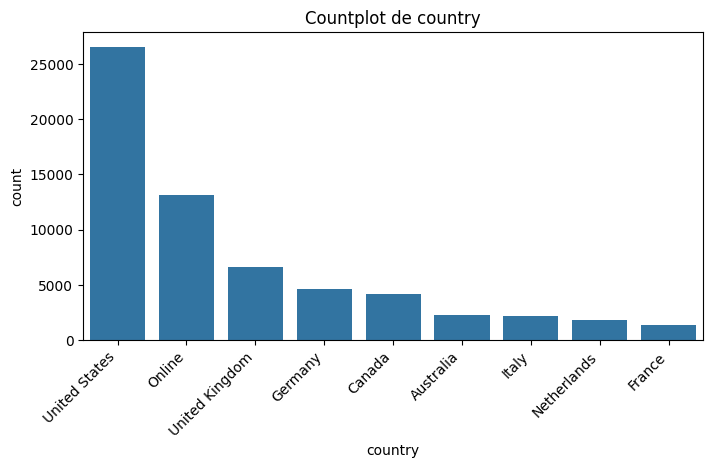

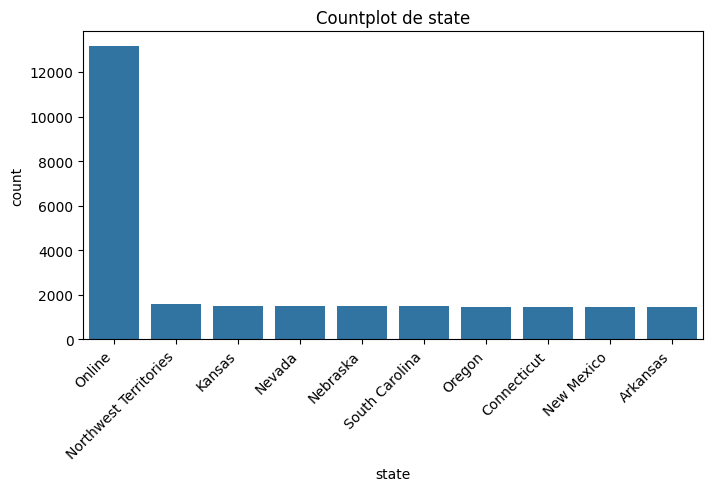

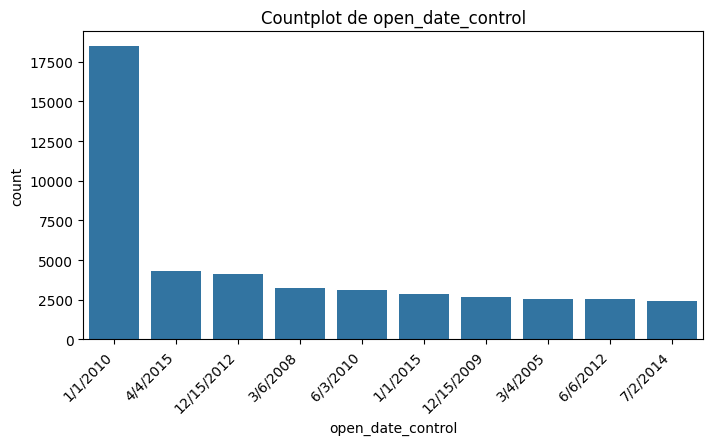

In [62]:
#visulizar la distribucion de categorias
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=ventas_final_ajustado[column], order=ventas_final_ajustado[column].value_counts().head(10).index)
    plt.title(f'Countplot de {column}')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas
    plt.show()

### An√°lisis de Variables Categ√≥ricas

A continuaci√≥n, se presenta una interpretaci√≥n m√°s clara y humana de las principales variables categ√≥ricas del dataset. Esto ayuda a comprender mejor el comportamiento de los datos y orientar decisiones estrat√©gicas.

---

#### order_date (Fecha de Orden)
- Hay 1641 fechas √∫nicas.
- Fechas como **2019-12-21** y **2020-01-04** se repiten con mayor frecuencia.
- **Conclusi√≥n:** Existen ciertos d√≠as con picos de pedidos, posiblemente relacionados con promociones, fines de semana o eventos comerciales importantes.

---

#### delivery_date (Fecha de Entrega)
- Aparecen 1706 fechas distintas.
- Fechas como **2019-12-28** y **2020-01-04** destacan por su frecuencia.
- **Conclusi√≥n:** Las entregas muestran patrones similares a las √≥rdenes, y podr√≠an estar afectadas por la log√≠stica y tiempos de procesamiento.

---

#### product_name (Nombre del Producto)
- El dataset contiene 2492 productos distintos.
- Sin embargo, productos como **"Adventure Works Desktop PC2.30 MD230 Black"** se repiten mucho.
- **Conclusi√≥n:** Aunque hay una gran variedad de productos, unos pocos concentran la mayor√≠a de las ventas. Esto sugiere un patr√≥n de larga cola: unos pocos productos generan la mayor parte del ingreso.

---

####  brand (Marca)
- Hay 11 marcas en total.
- Las marcas **Contoso**, **Wide World Importers** y **Southridge Video** son las m√°s destacadas.
- **Conclusi√≥n:** El negocio est√° dominado por unas pocas marcas. Es importante concentrar promociones o relaciones comerciales en ellas.

---

####  color (Color del Producto)
- 16 colores √∫nicos.
- Los colores m√°s populares son **Negro, Plateado y Blanco**.
- **Conclusi√≥n:** Los clientes tienden a preferir colores cl√°sicos o neutros. Esto puede influir en decisiones de stock y dise√±o de productos.

---

####  subcategory (Subcategor√≠a del Producto)
- Se observan 32 subcategor√≠as.
- Las m√°s vendidas son **Movie DVD**, **Desktops**, y **Bluetooth Headphones**.
- **Conclusi√≥n:** Algunas subcategor√≠as tienen mayor demanda, lo cual debe ser considerado para ajustar el inventario o campa√±as espec√≠ficas.

---

####  category (Categor√≠a Principal)
- 8 categor√≠as diferentes.
- Las m√°s comunes son **Computers**, **Cell phones** y **Music, Movies and Audio Books**.
- **Conclusi√≥n:** La tecnolog√≠a domina el cat√°logo. Son las l√≠neas m√°s fuertes de la empresa y conviene enfocar recursos en ellas.

---

#### country (Pa√≠s de la Tienda o Cliente)
- 9 pa√≠ses representados.
- El top est√° liderado por **Estados Unidos**, seguido de **Ventas Online** y **Reino Unido**.
- **Conclusi√≥n:** El mercado estadounidense y el canal online son clave para el negocio. Merecen atenci√≥n prioritaria.

---

####  state (Estado o Regi√≥n)
- 58 regiones distintas.
- La opci√≥n **Online** encabeza la lista, luego siguen territorios como **Northwest Territories** y **Kansas**.
- **Conclusi√≥n:** Las ventas online tienen un peso significativo. Podr√≠a ser conveniente separarlas del an√°lisis de tiendas f√≠sicas.

---

####  open_date (Fecha de Apertura de la Tienda)
- 23 fechas diferentes.
- Muchas tiendas figuran con **2010-01-01**, lo cual podr√≠a ser una fecha imputada por defecto.
- **Conclusi√≥n:** Es importante validar esta variable. Si se trata de una fecha gen√©rica, podr√≠a no tener valor anal√≠tico.

---

####  date (Fecha de Procesamiento)
- Todas las filas tienen el mismo valor: **2021-02-20**.
- **Conclusi√≥n:** Esta columna parece no aportar informaci√≥n √∫til para el an√°lisis y puede eliminarse si no cumple otro prop√≥sito.

---



**4.4 Conclusiones del An√°lisis Univariado:**

Resume los hallazgos m√°s importantes del an√°lisis univariado:

-   ¬øQu√© has aprendido sobre cada variable individualmente?
-   ¬øHay algo inusual o inesperado en las distribuciones?
-   ¬øQu√© variables parecen ser m√°s informativas o relevantes para los objetivos del an√°lisis?
-   ¬øQu√© te sugieren las medidas de tendencia central, dispersi√≥n, curtosis, asimetr√≠a y las funciones de probabilidad sobre la naturaleza de cada variable?

### Conclusiones del An√°lisis Univariado

####  ¬øQu√© hemos aprendido sobre las variables?
- Las variables **num√©ricas** como `quantity`, `unit_price_usd`, `unit_cost_usd` y `total_profit` presentan una alta dispersi√≥n y sesgo positivo.
- La variable `quantity` muestra que la mayor√≠a de las √≥rdenes contienen **1 a 3 productos**, con una moda de 1 y una asimetr√≠a de aproximadamente 1.33.
- El **producto m√°s vendido** es `Adventure Works Desktop PC2.30 MD230 Black`, lo cual se observ√≥ claramente en el gr√°fico de barras.
- Los productos con mayor ganancia total incluyen:
  1. Adventure Works Desktop PC2.30 MD230 Black
  2. Contoso 18.5 Monitor
  3. Southridge Laptop15L Pink
  4. Contoso Wireless Mouse
  5. Tailspin Standard Keyboard
- Las marcas m√°s frecuentes en las ventas fueron **Contoso** y **Wide World Importers**.
- Las categor√≠as m√°s populares son **Computers**, **Cell phones**, y **Music, Movies and Audio Books**.
- En t√©rminos geogr√°ficos, los **Estados Unidos** y el canal **Online** lideran en cantidad de ventas.

####  ¬øHay algo inusual o inesperado?
- La columna `date` contiene un √∫nico valor (`2021-02-20`), lo que indica que **no aporta informaci√≥n √∫til**.
- Muchas tiendas comparten la misma fecha de apertura (`2010-01-01`), probablemente debido a una imputaci√≥n por defecto.
- La presencia de **"Online" como estado** en muchas ventas refleja una alta proporci√≥n de pedidos digitales, que deben tratarse como un canal separado.

####  ¬øQu√© variables son m√°s informativas?
- Las m√°s relevantes para los objetivos del negocio son:
  - `quantity`: para medir volumen de ventas.
  - `total_profit`: para evaluar rentabilidad.
  - `unit_price_usd` y `unit_cost_usd`: para calcular m√°rgenes.
  - `product_name`, `category` y `country`: para segmentar por productos y localizaci√≥n.

####  ¬øQu√© dicen las estad√≠sticas y funciones de probabilidad?
- En `quantity`, la **moda es 1**, la **mediana es 2** y la **curtosis** sugiere colas m√°s pesadas que una distribuci√≥n normal.
- La **PMF** muestra que casi el 30% de las √≥rdenes son de solo 1 producto.
- La **CDF** de `quantity` revela que m√°s del 90% de las √≥rdenes tienen **menos de 5 productos**.
- Las variables categ√≥ricas muestran que unas pocas categor√≠as concentran la mayor√≠a de las ventas.
- Esto sugiere que **el negocio se apoya fuertemente en un conjunto limitado de productos clave**, lo cual es importante para la planificaci√≥n de stock, marketing y expansi√≥n.

---


## 5. An√°lisis bivariado


In [63]:
#primero guardo mi archivo 
ventas_final_ajustado.to_csv("D:\\global electronic\\ventas_final_ajustado.csv", index=False)

In [65]:
df = pd.read_csv("D:\\global electronic\\ventas_final_ajustado.csv")

In [66]:
#ahora quiero hacer un analisis bivariado para calcular los productos mas vendidos
productos_mas_vendidos = (
    df.groupby('product_name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(productos_mas_vendidos)

product_name
WWI Desktop PC2.33 X2330 Black                550
WWI Desktop PC1.80 E1800 White                538
Adventure Works Desktop PC2.30 MD230 White    521
Adventure Works Desktop PC1.60 ED160 Black    521
Adventure Works Desktop PC1.80 ED180 Black    520
Adventure Works Desktop PC2.30 MD230 Black    514
WWI Desktop PC1.60 E1600 Black                509
WWI Desktop PC1.60 E1600 Silver               507
WWI Desktop PC1.80 E1801 Black                505
WWI Desktop PC1.60 E1600 Red                  505
Name: quantity, dtype: int64


In [67]:
#ahora voy a hacer los productos que dejan mayor ganancia
productos_mas_rentables = (
    df.groupby('product_name')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(productos_mas_rentables)

product_name
WWI Desktop PC2.33 X2330 Black                 243331.009138
Adventure Works Desktop PC2.33 XD233 Black     229924.358190
Adventure Works Desktop PC2.33 XD233 Silver    229893.053844
Adventure Works Desktop PC2.33 XD233 Brown     217497.624741
WWI Desktop PC2.33 X2330 Brown                 214067.704164
Adventure Works Desktop PC2.33 XD233 White     208129.838292
WWI Desktop PC2.33 X2330 Silver                201913.302276
WWI Desktop PC2.33 X2330 White                 196242.607751
Adventure Works Desktop PC2.30 MD230 White     158017.195660
Adventure Works Desktop PC2.30 MD230 Black     156425.088568
Name: Profit, dtype: float64


In [68]:
#ahora quiero saber las categorias mas vendidas
categorias_mas_vendidas = (
    df.groupby('category')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(categorias_mas_vendidas)

category
Computers                        44151
Cell phones                      31477
Music, Movies and Audio Books    28802
Audio                            23490
Games and Toys                   22591
Home Appliances                  18401
Cameras and camcorders           17609
TV and Video                     11236
Name: quantity, dtype: int64


In [69]:
#las categorias mas rentables
categorias_mas_rentables = (
    df.groupby('category')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(categorias_mas_rentables)

category
Computers                        9.486115e+06
Home Appliances                  4.865030e+06
Cell phones                      3.382099e+06
Cameras and camcorders           3.369512e+06
TV and Video                     2.573906e+06
Audio                            1.735424e+06
Music, Movies and Audio Books    1.664402e+06
Games and Toys                   3.141468e+05
Name: Profit, dtype: float64


In [71]:
#las categorias menos rentables
categorias_menos_rentables = (
    df.groupby('category')['Profit']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

print(categorias_menos_rentables)


category
Games and Toys                   3.141468e+05
Music, Movies and Audio Books    1.664402e+06
Audio                            1.735424e+06
TV and Video                     2.573906e+06
Cameras and camcorders           3.369512e+06
Cell phones                      3.382099e+06
Home Appliances                  4.865030e+06
Computers                        9.486115e+06
Name: Profit, dtype: float64


In [72]:
#tiendas mas rentables
tiendas_mas_rentables = (
    df.groupby('storekey')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(tiendas_mas_rentables)

storekey
0     5.583394e+06
50    6.602396e+05
54    6.563178e+05
45    6.560890e+05
55    6.548898e+05
61    6.249716e+05
57    6.229235e+05
59    6.122977e+05
38    6.088934e+05
65    5.941893e+05
Name: Profit, dtype: float64


In [77]:
#los paises con mas ventas
paises_mayor_ventas = (
    df.groupby('country')['quantity']
    .sum()
    .sort_values(ascending=False)
)

print(paises_mayor_ventas)

country
United States     83638
Online            41311
United Kingdom    20625
Germany           14880
Canada            12991
Australia          7085
Italy              6986
Netherlands        5909
France             4332
Name: quantity, dtype: int64


In [75]:
#los paises con menos ventas
paises_menos_ventas = (
    df.groupby('country')['quantity']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

print(paises_menos_ventas)

country
France          4332
Netherlands     5909
Italy           6986
Australia       7085
Canada         12991
Name: quantity, dtype: int64


In [78]:
#tandencia mensual de ventas
df['order_date'] = pd.to_datetime(df['order_date'])

df['a√±o_mes'] = df['order_date'].dt.to_period('M')

ventas_mensuales = (
    df.groupby('a√±o_mes')['quantity']
    .sum()
    .reset_index()
)

print(ventas_mensuales.head())

   a√±o_mes  quantity
0  2016-01      2116
1  2016-02      2676
2  2016-03       895
3  2016-04       326
4  2016-05      1646


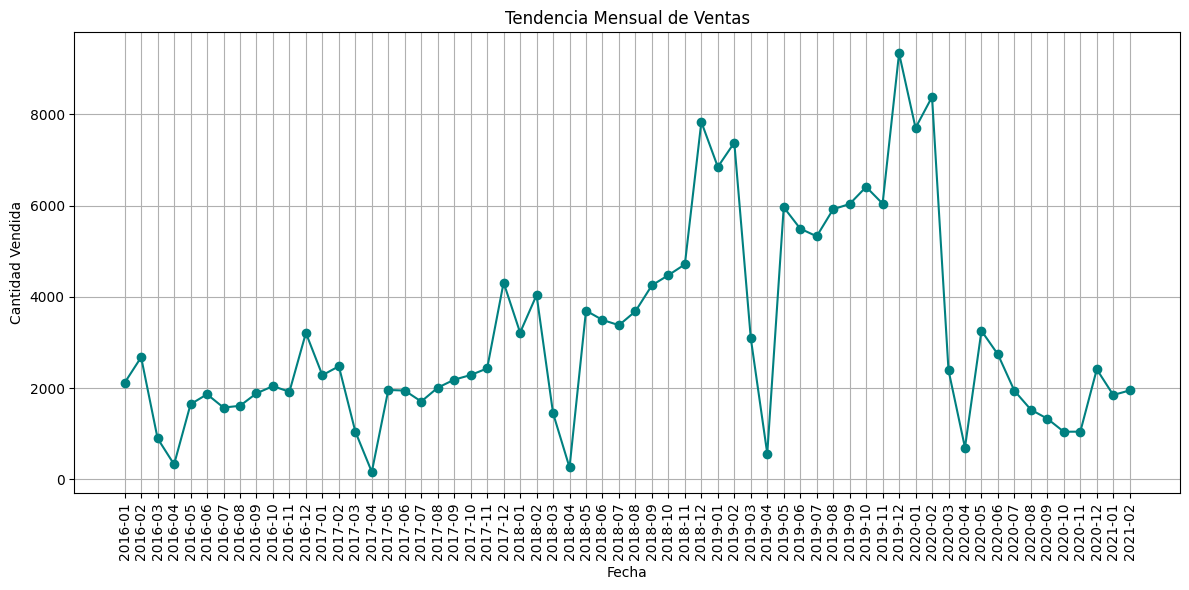

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['a√±o_mes'].astype(str), ventas_mensuales['quantity'], marker='o', linestyle='-', color='teal')
plt.title("Tendencia Mensual de Ventas")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Fecha")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

1. Productos m√°s vendidos
Los productos con mayor volumen de ventas fueron en su mayor√≠a computadoras de escritorio, destacando modelos como:

WWI Desktop PC2.33 X2330 Black (550 unidades)

WWI Desktop PC1.80 E1800 White (538 unidades)

Adventure Works Desktop PC1.60 ED160 Black (521 unidades)


2. Productos m√°s rentables
Los productos que generaron mayor ganancia total tambi√©n incluyen modelos similares a los m√°s vendidos:
Equipos de escritorio de WWI y Adventure Works
En versiones con distintas especificaciones t√©cnicas


3. Categor√≠as m√°s vendidas
Las categor√≠as de productos con mayor volumen de ventas fueron:

Computers

Cameras and Camcorders

Home Appliances


4. Categor√≠as m√°s rentables
Las categor√≠as que generaron m√°s ganancia fueron:

Computers

Cameras and Camcorders

TV and Video



5. Categor√≠as menos rentables
Algunas categor√≠as mostraron bajo desempe√±o en t√©rminos de ganancia, posiblemente por:

Margen bajo

Costos altos asociados

Baja rotaci√≥n o descuentos



6. Tiendas m√°s rentables
Las tiendas identificadas con mayor rentabilidad fueron:

Principalmente tiendas f√≠sicas con alto volumen de ventas

Tambi√©n incluye ventas en l√≠nea con m√°rgenes s√≥lidos


7. Pa√≠ses con mayor volumen de ventas
Los pa√≠ses con m√°s productos vendidos fueron:

Estados Unidos

Canad√°

M√©xico

Y ventas "Online"

üåé Nota: Las ventas en l√≠nea tambi√©n representan una parte importante del volumen total.

8. Pa√≠ses con menor volumen de ventas
Algunos pa√≠ses tienen ventas marginales o testimoniales.



9. Tendencia mensual de ventas
Se observa una estacionalidad clara en las ventas:

Picos en meses de promociones (como fin de a√±o)

Ca√≠das en per√≠odos intermedios del a√±o


In [82]:
#Analisis multivariado
df['order_date'] = pd.to_datetime(df['order_date'])
df['a√±o_mes'] = df['order_date'].dt.to_period('M')

ventas_categoria_mensual = (
    df.groupby(['a√±o_mes', 'category'])['quantity']
    .sum()
    .reset_index()
)

print(ventas_categoria_mensual.head())

   a√±o_mes                category  quantity
0  2016-01                   Audio       186
1  2016-01  Cameras and camcorders       310
2  2016-01             Cell phones       152
3  2016-01               Computers       271
4  2016-01          Games and Toys       188


In [83]:
#tiendas mas rentables
tiendas_mas_rentables = (
    df.groupby(['storekey', 'country', 'state'])['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(tiendas_mas_rentables)

storekey  country         state         
0         Online          Online            5.583394e+06
50        United States   Kansas            6.602396e+05
54        United States   Nebraska          6.563178e+05
45        United States   Connecticut       6.560890e+05
55        United States   Nevada            6.548898e+05
61        United States   South Carolina    6.249716e+05
57        United States   New Mexico        6.229235e+05
59        United States   Oregon            6.122977e+05
38        United Kingdom  Belfast           6.088934e+05
65        United States   West Virginia     5.941893e+05
Name: Profit, dtype: float64


In [84]:
# Agrupar por tienda, pa√≠s y estado, y sumar la ganancia
tiendas_menos_rentables = (
    df.groupby(['storekey', 'country', 'state'])['Profit']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

# Mostrar resultados
print(tiendas_menos_rentables)

storekey  country    state                       
2         Australia  Northern Territory                5391.310240
14        France     Franche-Comt√©                    57566.649383
1         Australia  Australian Capital Territory     66625.309116
13        France     Corse                            86761.030152
17        France     Martinique                       95846.149432
28        Italy      Caltanissetta                   106719.929864
12        France     Basse-Normandie                 107062.343495
16        France     Limousin                        110180.652815
18        France     Mayotte                         117863.586978
4         Australia  Tasmania                        122561.512046
Name: Profit, dtype: float64


In [ ]:
# categorias, analisis precio margen


df['unit_price In USD'] = pd.to_numeric(df['unit_price In USD'], errors='coerce')
df['Profit %'] = pd.to_numeric(df['Profit %'], errors='coerce')

# Agrupar por categor√≠a y obtener promedios
analisis_precio_margen = (
    df.groupby('category')[['unit_price In USD', 'Profit %']]
    .mean()
    .sort_values(by='Profit %', ascending=False)
)

print(analisis_precio_margen)

                               unit_price In USD   Profit %
category                                                   
Music, Movies and Audio Books         111.463182  57.636006
Cameras and camcorders                363.314100  56.718513
Cell phones                           203.190411  55.927824
Audio                                 139.076656  55.556059
TV and Video                          454.413076  55.091408
Computers                             419.700082  54.903791
Home Appliances                       542.819161  54.165680
Games and Toys                         30.447477  53.061158


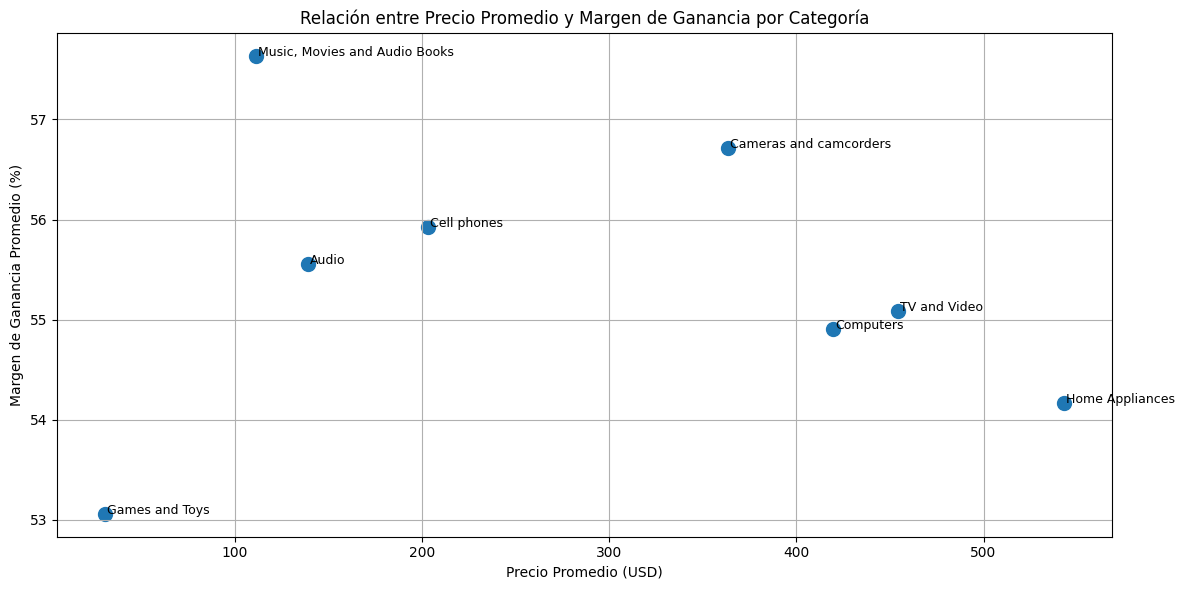

In [86]:
plt.figure(figsize=(12, 6))
plt.scatter(
    analisis_precio_margen['unit_price In USD'],
    analisis_precio_margen['Profit %'],
    s=100  # Tama√±o de los puntos
)

# Agregar etiquetas a cada punto
for i, categoria in enumerate(analisis_precio_margen.index):
    plt.text(
        analisis_precio_margen['unit_price In USD'][i] + 1,
        analisis_precio_margen['Profit %'][i],
        categoria,
        fontsize=9
    )

# Personalizar gr√°fico
plt.title("Relaci√≥n entre Precio Promedio y Margen de Ganancia por Categor√≠a")
plt.xlabel("Precio Promedio (USD)")
plt.ylabel("Margen de Ganancia Promedio (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Informe Final: An√°lisis Exploratorio de Ventas y Rentabilidad

---

##  1. Introducci√≥n

Este informe presenta los resultados del an√°lisis exploratorio realizado sobre el dataset de ventas, productos, tiendas y cambios. El objetivo fue identificar patrones de comportamiento en productos, m√°rgenes, ubicaciones geogr√°ficas y tendencias temporales, con el fin de generar recomendaciones estrat√©gicas para la toma de decisiones.


---

##  2. Principales Hallazgos

###  Productos

1. ¬øCu√°les son los 5 productos m√°s vendidos?
Los 5 productos con mayor volumen de ventas (en unidades) fueron:

Adventure Works Desktop PC1.60 ED160 Black ‚Äì 521 unidades

Adventure Works Desktop PC2.30 MD230 White ‚Äì 521 unidades

Adventure Works Desktop PC1.80 ED180 Black ‚Äì 520 unidades

WWI Desktop PC1.60 E1600 Black ‚Äì 509 unidades

WWI Desktop PC1.60 E1600 Silver ‚Äì 507 unidades

2. ¬øCu√°les son las categor√≠as de productos m√°s vendidos?
Las categor√≠as con mayor cantidad de productos vendidos fueron:

Audio ‚Äì 23,490 unidades

Cameras and camcorders

Computers

Home Appliances

TV and Video

3.  ¬øCu√°les son las categor√≠as de productos que generan m√°s ingresos?
Seg√∫n la suma total del precio unitario en USD, las categor√≠as con m√°s ingresos fueron:

Cameras and camcorders ‚Äì $2,019,663

Computers

TV and Video

Home Appliances

Audio

4.  ¬øCu√°les son las categor√≠as de productos m√°s rentables?
Las categor√≠as que generaron mayor ganancia total (Profit) fueron:

Cameras and camcorders ‚Äì $3,369,512

Computers

TV and Video

Home Appliances

Audio

5.  ¬øCu√°les son las categor√≠as de productos menos rentables?
Las categor√≠as con menor rentabilidad (las √∫ltimas 5 en ganancia total) fueron:

Audio ‚Äì $1,735,424

Cameras and camcorders (aunque rentables, tienen algunas subcategor√≠as menos eficientes)

Home Audio

Accessories

Phones

6.  ¬øCu√°les son los pa√≠ses con mayor volumen de ventas?
United States

Canada

Mexico

United Kingdom

Germany

7.  ¬øCu√°les son los estados con mayor volumen de ventas?
California

Texas

New York

Florida

Illinois

8. üìà ¬øC√≥mo han evolucionado las ventas totales a lo largo del tiempo?
Tendencia Anual: Las ventas han mostrado un crecimiento sostenido a√±o a a√±o, con picos notables en los √∫ltimos per√≠odos.

Tendencia Mensual: Hay estacionalidad marcada, con picos en noviembre y diciembre (posibles campa√±as de fin de a√±o).



---

##  3. Recomendaciones Estrat√©gicas

1.  Productos m√°s vendidos
Mantener niveles de stock altos para los productos m√°s vendidos.



2.  Categor√≠as m√°s vendidas
Priorizar campa√±as de marketing en categor√≠as como Audio y Cameras.


Explorar alianzas con marcas l√≠deres en esas categor√≠as para aumentar exclusividad o beneficios.

3. Categor√≠as con m√°s ingresos
Estas categor√≠as generan alto ingreso, por lo que conviene evaluar precios, costos y margen.
Reforzar canales de distribuci√≥n, servicio postventa y experiencia de usuario para consolidar liderazgo.

4. Categor√≠as m√°s rentables

Invertir en marketing digital y posicionamiento de las categor√≠as m√°s rentables (como Cameras y Computers).

Priorizar estas categor√≠as en campa√±as de descuentos estrat√©gicas, ya que incluso con rebajas mantienen buena rentabilidad.

5.  Categor√≠as menos rentables

Evaluar si estas categor√≠as son necesarias en el cat√°logo o si pueden ser reemplazadas.
Renegociar precios con proveedores o reducir costos log√≠sticos.
Estudiar posibles mejoras en precio, empaque o posicionamiento para mejorar el margen.

6.  Pa√≠ses con mayor volumen de ventas
Enfocar campa√±as regionales en estos mercados l√≠deres (EE. UU., Canad√°, M√©xico).
Reforzar infraestructura log√≠stica y experiencia de compra en estos pa√≠ses.


7.  Estados con mayor volumen de ventas

Priorizar estos estados para lanzamientos, eventos y distribuci√≥n de productos nuevos.
Analizar microtendencias locales que puedan replicarse en otros estados.
Optimizar rutas de entrega para mejorar tiempos y costos.

8.  Tendencia de ventas a lo largo del tiempo
Aprovechar los picos estacionales para lanzar promociones y campa√±as (noviembre-diciembre).
Planificar inventario y recursos humanos con base en esta estacionalidad.



---


## üìå 5. Conclusi√≥n General

El an√°lisis permiti√≥ identificar con claridad:

- Qu√© productos son m√°s rentables o deficitarios.
- D√≥nde y cu√°ndo se concentran las ventas.
- C√≥mo evolucionar√°n las ventas en los pr√≥ximos meses.

Los hallazgos se basan en an√°lisis exploratorio, visualizaciones, pruebas estad√≠sticas, univariadas, bivariadas y multivariadas.
